# ****Task 1****

## (a)

In [ ]:
import pandas as pd
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

returns_A = pd.Series([-0.02,-0.01,0.03])
returns_B = pd.Series([0.05,0.03,-0.05])

mean_A = returns_A.mean()
mean_B = returns_B.mean()

std_A = returns_A.std()
std_B = returns_B.std()

correlation_AB = returns_A.corr(returns_B)

print('Mean of Asset A:', mean_A)
print('Mean of Asset B:', mean_B)
print('STD of Asset A:', std_A)
print('STD of Asset B:', std_B)
print('Correlation of Assets A and B:', correlation_AB)

Mean of Asset A: 0.0
Mean of Asset B: 0.01
STD of Asset A: 0.026457513110645904
STD of Asset B: 0.052915026221291815
Correlation of Assets A and B: -1.0


## Notes for (a):

The standard deviation of an asset with X=3 datapoints is calculated with
   $$
   \sigma = \sqrt{\frac{(X_1 - \mu)^2 + (X_2 - \mu)^2 + (X_3 - \mu)^2}{3}}
   $$

where $$\mu$$ is the mean, calculated with
$$
   \mu = \frac{X_1 + X_2 + X_3}{3}
   $$

The formula for the correlation between Asset A and Asset B is:

$$
\rho_{A,B} = \frac{\text{Cov}(r_A,r_B)}{\sigma_A \cdot \sigma_B}
$$

The formula for the covariance between Asset A and Asset B is:

$$
\text{Cov}(A,B) = \mathbb{E}[(r_A - \mathbb{E}[r_A])(r_B - \mathbb{E}[r_B])]
$$

## (b)

In [ ]:
covariance_AB = returns_A.cov(returns_B)
w_A = (std_B**2 - covariance_AB) / (std_A**2 + std_B**2 - 2 * covariance_AB)
w_B = 1 - w_A
minimum_portfolio_weights = (w_A, w_B)
portfolio_variance = (w_A**2 * std_A**2) + (w_B**2 * std_B**2) + (2 * w_A * w_B * covariance_AB)
portfolio_variance = round(portfolio_variance, 10)
portfolio_std_dev = np.sqrt(portfolio_variance)

print('weight for Asset A:', w_A)
print('weight for Asset B:',w_B)
print('Weights for Assets A and B:', minimum_portfolio_weights)
print('Expected return for portfolio with minimum vatriance:', w_A*mean_A+w_B*mean_B)
print('Portfolio Variance:', portfolio_variance)
print('Volatility of Portfolio:', portfolio_std_dev)


weight for Asset A: 0.6666666666666666
weight for Asset B: 0.33333333333333337
Weights for Assets A and B: (0.6666666666666666, 0.33333333333333337)
Expected return for portfolio with minimum vatriance: 0.003333333333333334
Portfolio Variance: -0.0
Volatility of Portfolio: -0.0


## Notes for (b)

The formula for the optimal weight of Asset A in a portfolio with two assets to minimize variance is

$$
w_A = \frac{\sigma_B^2 - \text{Cov}(A,B)}{\sigma_A^2 + \sigma_B^2 - 2 \times \text{Cov}(A,B)}
$$

where weight in asset B is

$$
w_B = 1 - w_A
$$

Portfolio return of Two-Asset Portfolio 
$$
\text{r}_P = w_A * r_A + w_B * r_B
$$

where $$ r_A \text{ and } r_B $$ are expected returns of Assets A and B with $$\mu = \frac{X_1 + X_2 + X_3}{3}$$


Portfolio Variance of Two-Asset Portfolio
$$
\text{Var}_P = w_A^2 \cdot \sigma_A^2 + w_B^2 \cdot \sigma_B^2 + 2 \cdot w_A \cdot w_B \cdot \text{cov}(A,B)
$$




## (c)

### Initial Thoughts
- All portfolios consist of a long position in a portfolio made up of Stock A and Stock B, since risky assets are short-restricted

- Criteria 1 - Zero-cost: To maintain zero cost, the long positions in the risky assets must be financed by a short position in the risk-free asset, which is always shorted. The position in the risky asset w_r is always -1.

- Criteria 2 - Positive return in all states, strictly positive return in at least one state

- Every portfolio constellation is financed with borrowing money for 0% from risk free rate, offering an arbitrage opportunity, with nominal returns approaching infinity as leverage through borrowing at risk free rate r_f increases

The general equation is:

$$
r_A \cdot w_a + r_B \cdot (1 - w_a) \geq 0
$$

With the solution:

$$
w_a \geq \frac{-r_B}{r_A - r_B}
$$



We can define the weights of Asset A through the following constraints:

State 1:

$$
-0.02 \cdot w_a + 0.05 \cdot (1 - w_a) \geq 0
$$

Solve for \( w_a \):
$$
w_a \leq \frac{5}{7}
$$


State 2:

$$
-0.01 \cdot w_a + 0.03 \cdot (1 - w_a) \geq 0
$$

Solve for \( w_a \):
$$
w_a \leq \frac{3}{4}
$$


State 3:

$$
0.03 \cdot w_a - 0.05 \cdot (1 - w_a) \geq 0
$$


Solve for \( w_a \):
$$
w_a \geq \frac{5}{8}
$$


Thus, the set of weights for Asset A can be characterized:

$$
\frac{5}{8} \leq w_a \leq \frac{5}{7}
$$

And the weight of Asset B can be characterized:

$$
\frac{3}{8} \leq w_b \leq \frac{2}{7}
$$


Where 
$$
w_a + w_b = 1
$$

Side Calculations in Python below

In [ ]:
w_a_scen_1 = np.round(-0.05 / (-0.05 - 0.02), 2)
w_a_scen_2 = np.round(-0.03 / (-0.03 - 0.01), 2)  
w_a_scen_3 = np.round(0.05 / (0.05 + 0.03), 2)

print('Scenario 1')
print(w_a_scen_1)


print('State 2')
print(w_a_scen_2)


print('State 3')
print(w_a_scen_3)

Scenario 1
0.71
State 2
0.75
State 3
0.62


# ****Task 2****

## (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
# Setup
# Basic inputs for bonds and stocks

# Mean
SB_mean = np.array([[0.1], [0.05]])

# Variance-Covariance Matrix
SB_Sigma = np.array([[0.2**2, 0.0002], [0.0002, 0.08**2]])

# Vector of ones
ones2 = np.ones((2, 1))

# Inverse of the variance-covariance matrix
SB_invSigma = np.linalg.inv(SB_Sigma)


In [2]:
# Define vectors for weights: Stock = (0,1)^t and Bond = (1,0)^t
E_w = np.array([[1], [0]])  # Bond
B_w = np.array([[0], [1]])  # Stock

# Create many portfolios as a combination of stock and bond

# Possible combinations of weights
y = np.arange(-10, 10.01, 0.01)  # Create a sequence from -10 to 10 with step 0.01

# Convert y to a 2D array where each row is a weight for a portfolio
y = y.reshape(1, -1)
port = np.dot(B_w, y) + np.dot(E_w, (1 - y))

# Compute expected returns
port_mean = np.dot(port.T, SB_mean)

# Compute var-covar matrix of portfolio returns (we will only use the variances on the main diagonal)
port_var = np.diag(np.dot(np.dot(port.T, SB_Sigma), port))
port_vol = np.sqrt(port_var).reshape(len(port_var), 1)

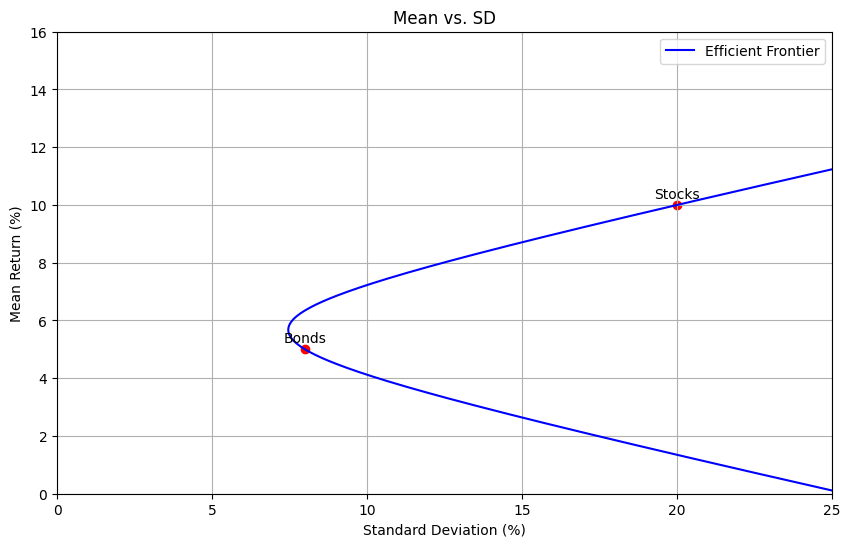

In [3]:
# Plot MV
plt.figure(figsize=(10, 6))
plt.plot(port_vol * 100, port_mean * 100, 'b-', label='Efficient Frontier')
plt.title("Mean vs. SD")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 25)
plt.ylim(0, 16)

# Add points for stock and bond funds
plt.scatter(np.sqrt(np.diag(SB_Sigma)) * 100, SB_mean * 100, color='red')
SB_labels = ["Stocks", "Bonds"]

# Annotate pointsS
for i, txt in enumerate(SB_labels):
    plt.annotate(txt, (np.sqrt(np.diag(SB_Sigma))[i] * 100, SB_mean[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.legend()
plt.grid(True)
plt.show()

## (b)

In [4]:

from sympy import symbols, diff, solve


# Define the variable and the equation, let w be the weight of stock
w = symbols('w')
sigma_squared_p = w**2 * 0.04 + (1 - w)**2 * 0.0064 + 2 * w * (1 - w) * 0.0002

# Compute the derivative with respect to w and solve for when the derivative equals zero
sigma_squared_p_derivative = diff(sigma_squared_p, w)
w_solution = solve(sigma_squared_p_derivative, w)

# Show the solution
w_solution


[0.134782608695652]

The weight for stock is about $0.135$, and the weight for bond is about $0.865$.

## (c)

In [5]:
# Risk-free rate
rf = 0.03

# Excess return
SB_excess = SB_mean - rf

# Tangent portfolio weights 
wT1 = (SB_Sigma[1, 1] * SB_excess[0] - SB_Sigma[1, 0] * SB_excess[1]) / \
      (SB_Sigma[0, 0] * SB_excess[1] + SB_Sigma[1, 1] * SB_excess[0] - SB_Sigma[0, 1] * np.sum(SB_excess))

# Ensure wT1 is a scalar
wT1 = wT1[0]

T_w = np.array([[wT1], [1 - wT1]])

# Mean and volatility of tangent portfolio
T_mean = np.dot(T_w.T, SB_mean)
T_vol = np.sqrt(np.dot(np.dot(T_w.T, SB_Sigma), T_w))

# Sharpe ratio
T_SR = (T_mean - rf) / T_vol

# Possible combinations of weights
yT = np.arange(-10, 10.01, 0.01)
yT = yT.reshape(1, -1)

# Create many portfolios using E and B
portT = np.dot(E_w, yT) + np.dot(B_w, (1 - yT))

# Compute expected returns
portT_mean = np.dot(portT.T, SB_mean)

# Compute var-covar matrix of portfolio returns (we will only use the variances on the main diagonal)
portT_var = np.diag(np.dot(np.dot(portT.T, SB_Sigma), portT))
portT_vol = np.sqrt(portT_var).reshape(len(portT_var), 1)

Plot the CML and tangent portfolio

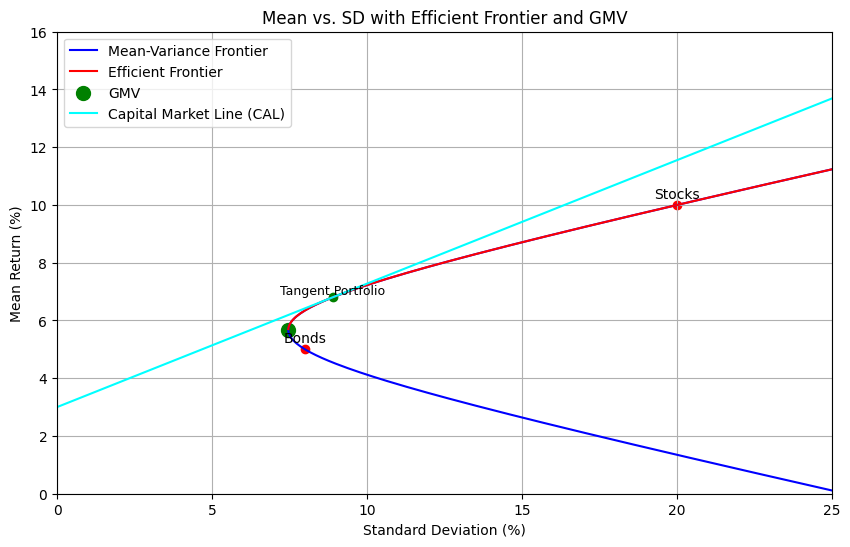

In [6]:
# Find the Global Minimum Variance (GMV) Portfolio
inv_sigma = np.linalg.inv(SB_Sigma)
ones = np.ones(len(SB_mean))

w_gmv = np.dot(inv_sigma, ones) / np.dot(ones.T, np.dot(inv_sigma, ones))
gmv_return = np.dot(w_gmv, SB_mean)  # GMV expected return
gmv_vol = np.sqrt(np.dot(w_gmv.T, np.dot(SB_Sigma, w_gmv)))  # GMV standard deviation

# Plot Mean-Variance Frontier and Efficient Frontier
plt.figure(figsize=(10, 6))

# Plot portfolios' Mean-Variance Frontier
plt.plot(port_vol * 100, port_mean * 100, 'b-', label='Mean-Variance Frontier')

# Plot Efficient Frontier (above GMV)
plt.plot(port_vol[port_mean >= gmv_return] * 100, port_mean[port_mean >= gmv_return] * 100, 'r-', label='Efficient Frontier')

# Plot GMV
plt.scatter(gmv_vol * 100, gmv_return * 100, color='green', marker='o', s=100, label='GMV')

# Plot stock and bond points
plt.scatter(np.sqrt(np.diag(SB_Sigma)) * 100, SB_mean * 100, color='red')
SB_labels = ["Stocks", "Bonds"]

# Annotate stock and bond points
for i, txt in enumerate(SB_labels):
    plt.annotate(txt, (np.sqrt(np.diag(SB_Sigma))[i] * 100, SB_mean[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

# Add the CAL to the picture

# Possible combinations of weights
yf = np.arange(0, 10.01, 0.01)

# Compute expected returns
CAL_mean = rf + yf * (T_mean[0, 0] - rf)

# Compute volatilities
CAL_vol = yf * T_vol[0, 0]

# Add CAL to the graph
plt.plot(CAL_vol * 100, CAL_mean * 100, color='cyan', label='Capital Market Line (CAL)')

# Add points for Tangent portfolio
plt.scatter(T_vol * 100, T_mean * 100, color='green', marker='o')
plt.text(T_vol * 100, T_mean * 100, 'Tangent Portfolio', fontsize=9, ha='center', va='bottom')

plt.title("Mean vs. SD with Efficient Frontier and GMV")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 25)
plt.ylim(0, 16)
plt.legend()
plt.grid(True)
plt.show()

## (d)

In [7]:
# Calculte the weight of tangent portfolio in the optimal portfolio
w_tangent = (T_mean - 0.03)/(4*(T_vol**2))
print(w_tangent)
# So the weight for the tangent portfolio is ~1.20

[[1.20135959]]


So the weight for the tangent portfolio is $1.201$.

In [8]:
# First compute the utility
wstar_mean = rf + w_tangent * (T_mean - rf)
wstar_vol = w_tangent * T_vol
utility = wstar_mean - (4/2*wstar_vol**2)

print(utility)

[[0.05285513]]


When volatility of the asset equals 0, we get the safe return of the asset equals to $0.0529$.

## (e)

(i) The ratio will not change if a = 8 since the risk-aversion parameter will only affect the weight of tangent portfolio in the optimal portfolio, not the tangent portfolio itself. In case of optimal portfolio, the investor will go for more risk-free debt (and giving up some of the holdings in the tangent portfolio), thus NOT changing the ratio, and move downnwards along CAL. --> stock-bond ratio is the same

(ii) In theory, the stock-bond ratio will become higher since the CAL will become flatter (a rise in risk premium will decrease the slope of the line) and the tangent point will lie on a higher position of the efficient frontier, which means the investor will invest more in stocks and less bonds. This shift indicates that, despite the increase in $r_f$, the expected returns from riskier assets like stocks still outweigh the perceived benefits of safer bonds under certain economic conditions, thus making the investors bolder to bet more. --> stock-bond ratio rises.

However, on practice, CAPM might increase, as market risk premium might not increase at the same rate as risk-free rate does. That lag might result in shift of the efficient frontier, making stocks and bonds having higer return, potentially mitigating the effect of flattening CAL in the short-term. 

# ****Task 3****

## (a)
 To identify the least preferred asset, plot the returns and deviations of all assets. The one located furthest to the southeast (IV quadrant) is less desirable, as it offers lower returns relative to its high risk (greater deviation). This asset has a poor return-risk profile, providing too little return for its level of risk.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate portfolio performance (return and volatility)
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility


$$ 
\textbf{Portfolio Return:} \\
\text{return} = \sum_{i=1}^{N} (\mu_i \cdot w_i) \tag{3.1}
$$

Where:
- $ \mu_i $: The expected return of the $ i $-th asset, representing the average return you anticipate from that asset over a given period.
- $ w_i $: The weight of the $ i $-th asset in the portfolio, which is the fraction of the total portfolio invested in that asset.
- $ N $: The total number of assets in the portfolio, indicating its diversification level.

---

$$ 
\textbf{Portfolio Volatility:} \\
\text{volatility} = \sqrt{ \mathbf{w}^T \cdot \mathbf{\Sigma} \cdot \mathbf{w} } \tag{3.2}
$$

Where:
- $ \mathbf{w} $: The vector of portfolio weights, where each element represents the proportion invested in each asset.
- $ \mathbf{\Sigma} $: The covariance matrix of asset returns, containing variances of individual assets and covariances between pairs of assets.


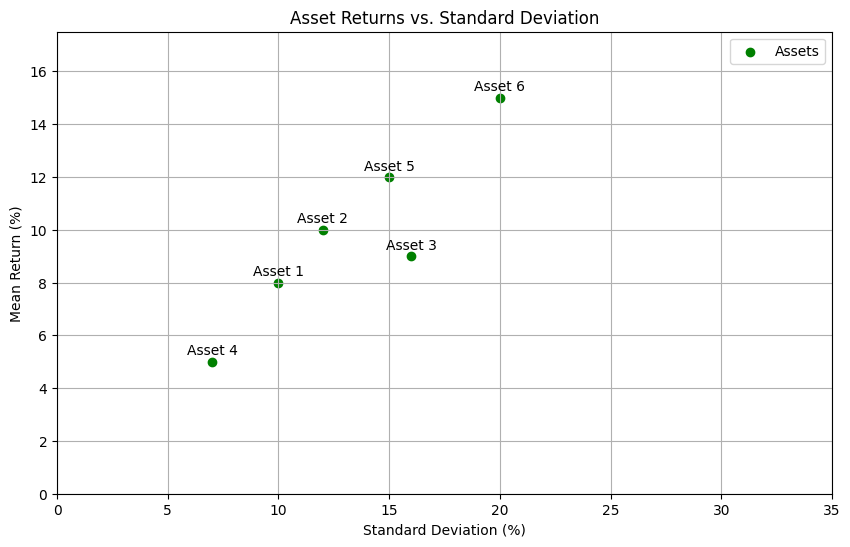

In [10]:
# Data: Mean returns and standard deviations (volatilities) of the six assets
asset_returns = np.array([0.08, 0.1, 0.09, 0.05, 0.12, 0.15])  # Asset returns
asset_stddevs = np.array([0.10, 0.12, 0.16, 0.07, 0.15, 0.20])  # Asset standard deviations
# Plot the six assets
plt.figure(figsize=(10, 6))
plt.scatter(asset_stddevs * 100, asset_returns * 100, color='green', label='Assets')

# Annotate each of the six assets
asset_labels = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5', 'Asset 6']
for i, txt in enumerate(asset_labels):
    plt.annotate(txt, (asset_stddevs[i] * 100, asset_returns[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Asset Returns vs. Standard Deviation")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 35)
plt.ylim(0, 17.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

**Asset 3** is **the least desirable** because it offers a relatively high standard deviation (risk) of nearly 16% while providing a return of around 9%, which is lower than other assets with similar or even less risk, meaning that Asset 3 is the least efficient in terms of its return-to-risk ratio.

## (b)  
In the no short sales scenario (red dashed line on the plot below), the optimizer can only assign positive weights between 0 and 1. For higher return targets, it allocates more to Asset 6 because it offers the highest return. Without the ability to short-sell and offset risk, the optimizer depends heavily on Asset 6 to achieve higher returns, as no combination with other assets will offer that high return given the risk. Since there’s no correlation between assets, the optimizer favors Asset 6, as other portfolios might achieve similar returns but with higher risk.

Given that the correlation between the assets cannot be determined from the information provided, it is assumed to be zero. 

We construct the efficient frontier both with and without short-sale constraints for illustrative purposes.
The following function, `minimize_volatility`, is designed to optimize a portfolio by finding the asset weights that minimize its volatility (standard deviation). The optimization has two key constraints, of them having expected return match a specified target return and ensuring the portfolio is fully invested. The minimize function attempts to find the optimal weights (w) that minimize the volatility of the portfolio. It uses the Sequential Least Squares Programming (SLSQP) method to find the weights while respecting the bounds on the weights (between 0 and 1) and ensuring the portfolio satisfies the return and weight sum constraints. The result of this optimization results in the variable result.

Meantime, we define `minimize_volatility_no_short` with bounds for each weight of the corresponding asset in the matrix of weights

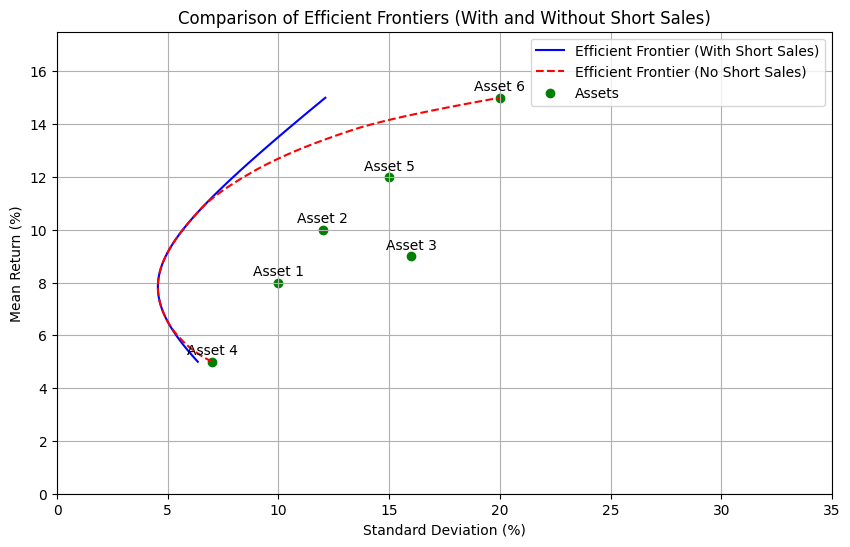

In [11]:
# Function to calculate portfolio performance (return, volatility)
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

# Function to minimize volatility with short sales allowed
def minimize_volatility(weights, mean_returns, cov_matrix, target_return):
    # Define the constraints (target return and sum of weights equals 1)
    cons = ({'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - target_return},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # No bounds for weights (short sales allowed)
    bounds = None

    # Minimize the portfolio's volatility (standard deviation)
    result = minimize(lambda x: portfolio_performance(x, mean_returns, cov_matrix)[1], weights, 
                      method='SLSQP', bounds=bounds, constraints=cons)
    
    return result

# Function to minimize volatility with short sales not allowed (non-negative weights)
def minimize_volatility_no_short(weights, mean_returns, cov_matrix, target_return):
    # Define the constraints (target return and sum of weights equals 1)
    constraints = [{'type': 'eq', 'fun': lambda w: portfolio_performance(w, mean_returns, cov_matrix)[0] - target_return},
                   {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    
    # Set bounds for each weight between 0 and 1 (no short sales allowed)
    bounds = [(0, 1) for _ in range(len(mean_returns))]
    
    # Minimize the portfolio's volatility (standard deviation)
    result = minimize(lambda w: portfolio_performance(w, mean_returns, cov_matrix)[1],  # Minimize the risk (volatility)
                      weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result


# Data: Mean returns and standard deviations (volatilities) of the six assets
asset_returns = np.array([0.08, 0.1, 0.09, 0.05, 0.12, 0.15])  # Asset returns
asset_stddevs = np.array([0.10, 0.12, 0.16, 0.07, 0.15, 0.20])  # Asset standard deviations

# Covariance matrix (assuming no correlations between assets for simplicity)
cov_matrix = np.diag(asset_stddevs ** 2)

# Number of assets
num_assets = len(asset_returns)

# Initial portfolio weights (equal distribution)
weights = np.ones(num_assets) / num_assets

# Generate efficient frontier with short sales allowed
target_returns = np.linspace(min(asset_returns), max(asset_returns), 100)
efficient_vols = []
for r in target_returns:
    result = minimize_volatility(weights, asset_returns, cov_matrix, r)
    efficient_vols.append(result.fun)

# Generate efficient frontier without short sales
efficient_vols_no_short = []
for r in target_returns:
    result = minimize_volatility_no_short(weights, asset_returns, cov_matrix, r)
    efficient_vols_no_short.append(result.fun)

# Plot both efficient frontiers for comparison
plt.figure(figsize=(10, 6))

# Efficient frontier with short sales allowed
plt.plot(np.array(efficient_vols) * 100, target_returns * 100, 'b-', label='Efficient Frontier (With Short Sales)')

# Efficient frontier without short sales
plt.plot(np.array(efficient_vols_no_short) * 100, target_returns * 100, 'r--', label='Efficient Frontier (No Short Sales)')

# Plot the six assets
plt.scatter(asset_stddevs * 100, asset_returns * 100, color='green', label='Assets')

# Annotate each of the six assets
asset_labels = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5', 'Asset 6']
for i, txt in enumerate(asset_labels):
    plt.annotate(txt, (asset_stddevs[i] * 100, asset_returns[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title("Comparison of Efficient Frontiers (With and Without Short Sales)")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 35)
plt.ylim(0, 17.5)
plt.legend()
plt.grid(True)
plt.show()

# ****Task 4****

## (a) 
To evaluate historical performance, we begin by analyzing the cumulative returns of the portfolios. Each month, we adjust the Target portfolio's allocation, gradually reducing the S&P 500 exposure from 90% to 40%. This monthly restructuring allows for a more dynamic and responsive approach to adjusting the portfolio.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\vikto\AppData\Local\Temp\ipykernel_23928\2887213215.py:90: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.018776655347736558' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  aligned_returns.at[aligned_returns.index[i], 'Target Fund'] = new_value


NaN values in SP500:
0
NaN values in VUSTX:
0
NaN values in SP500 pct change:
1
NaN values in VUSTX pct change:
1


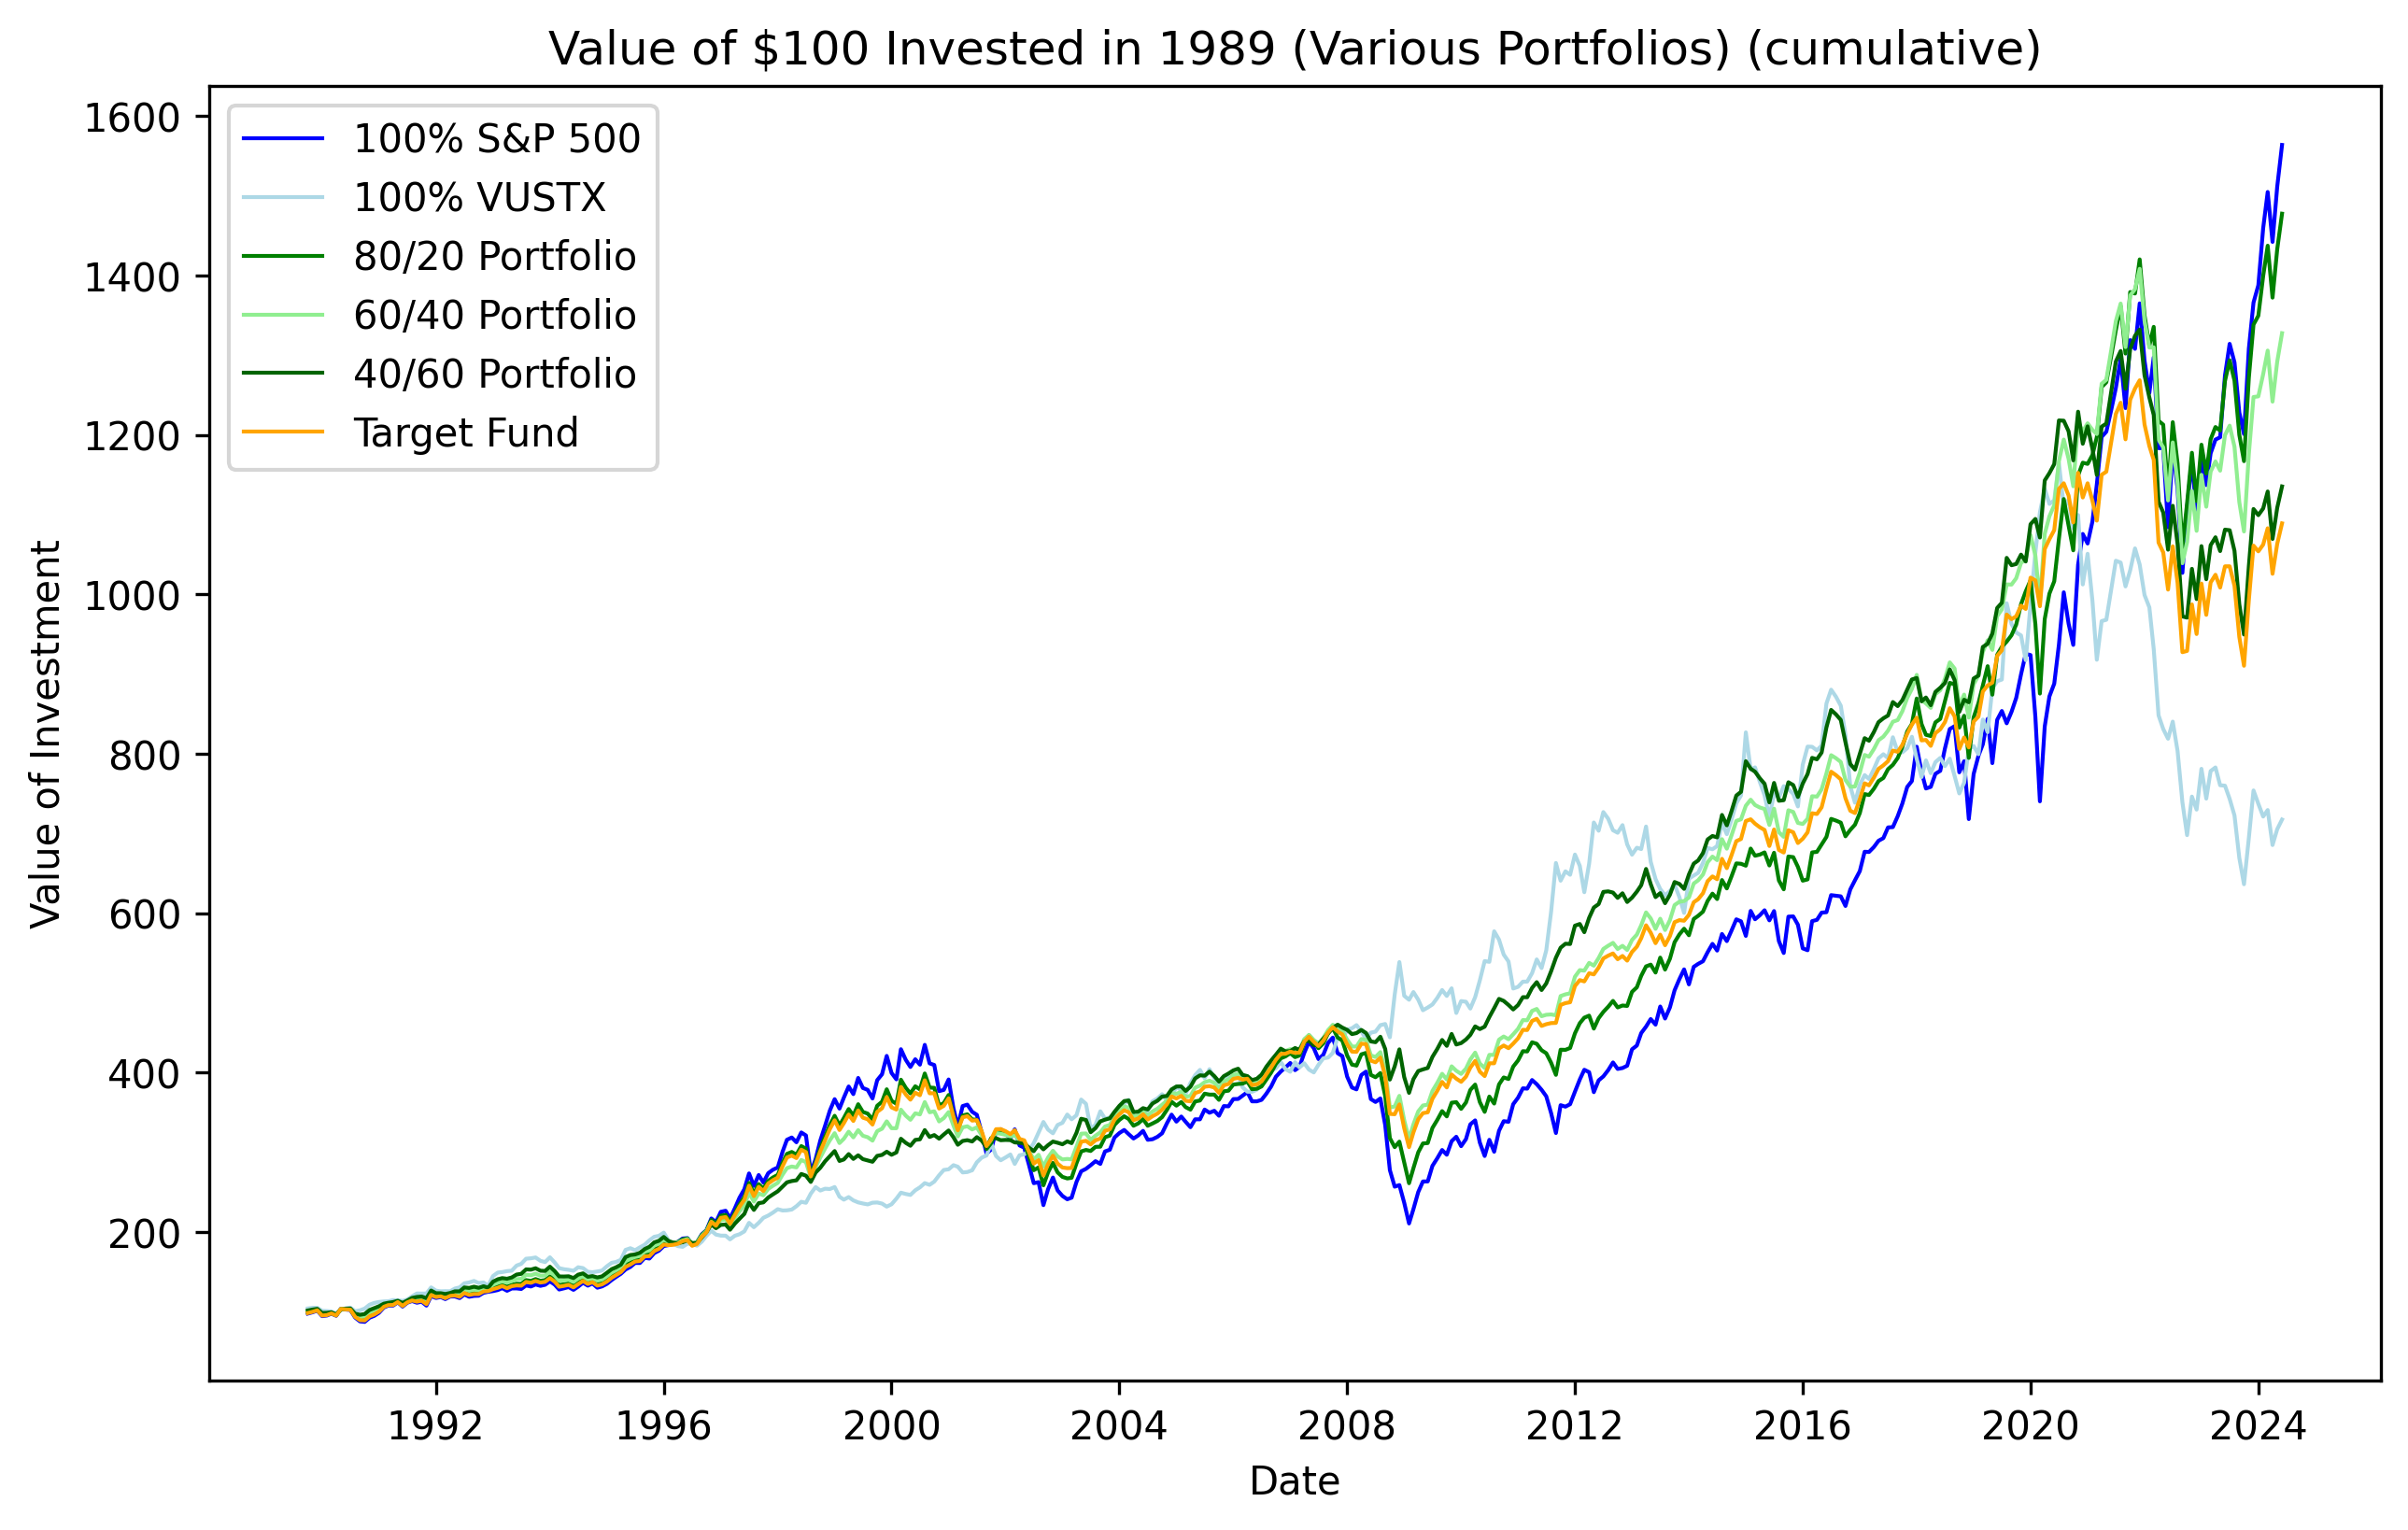

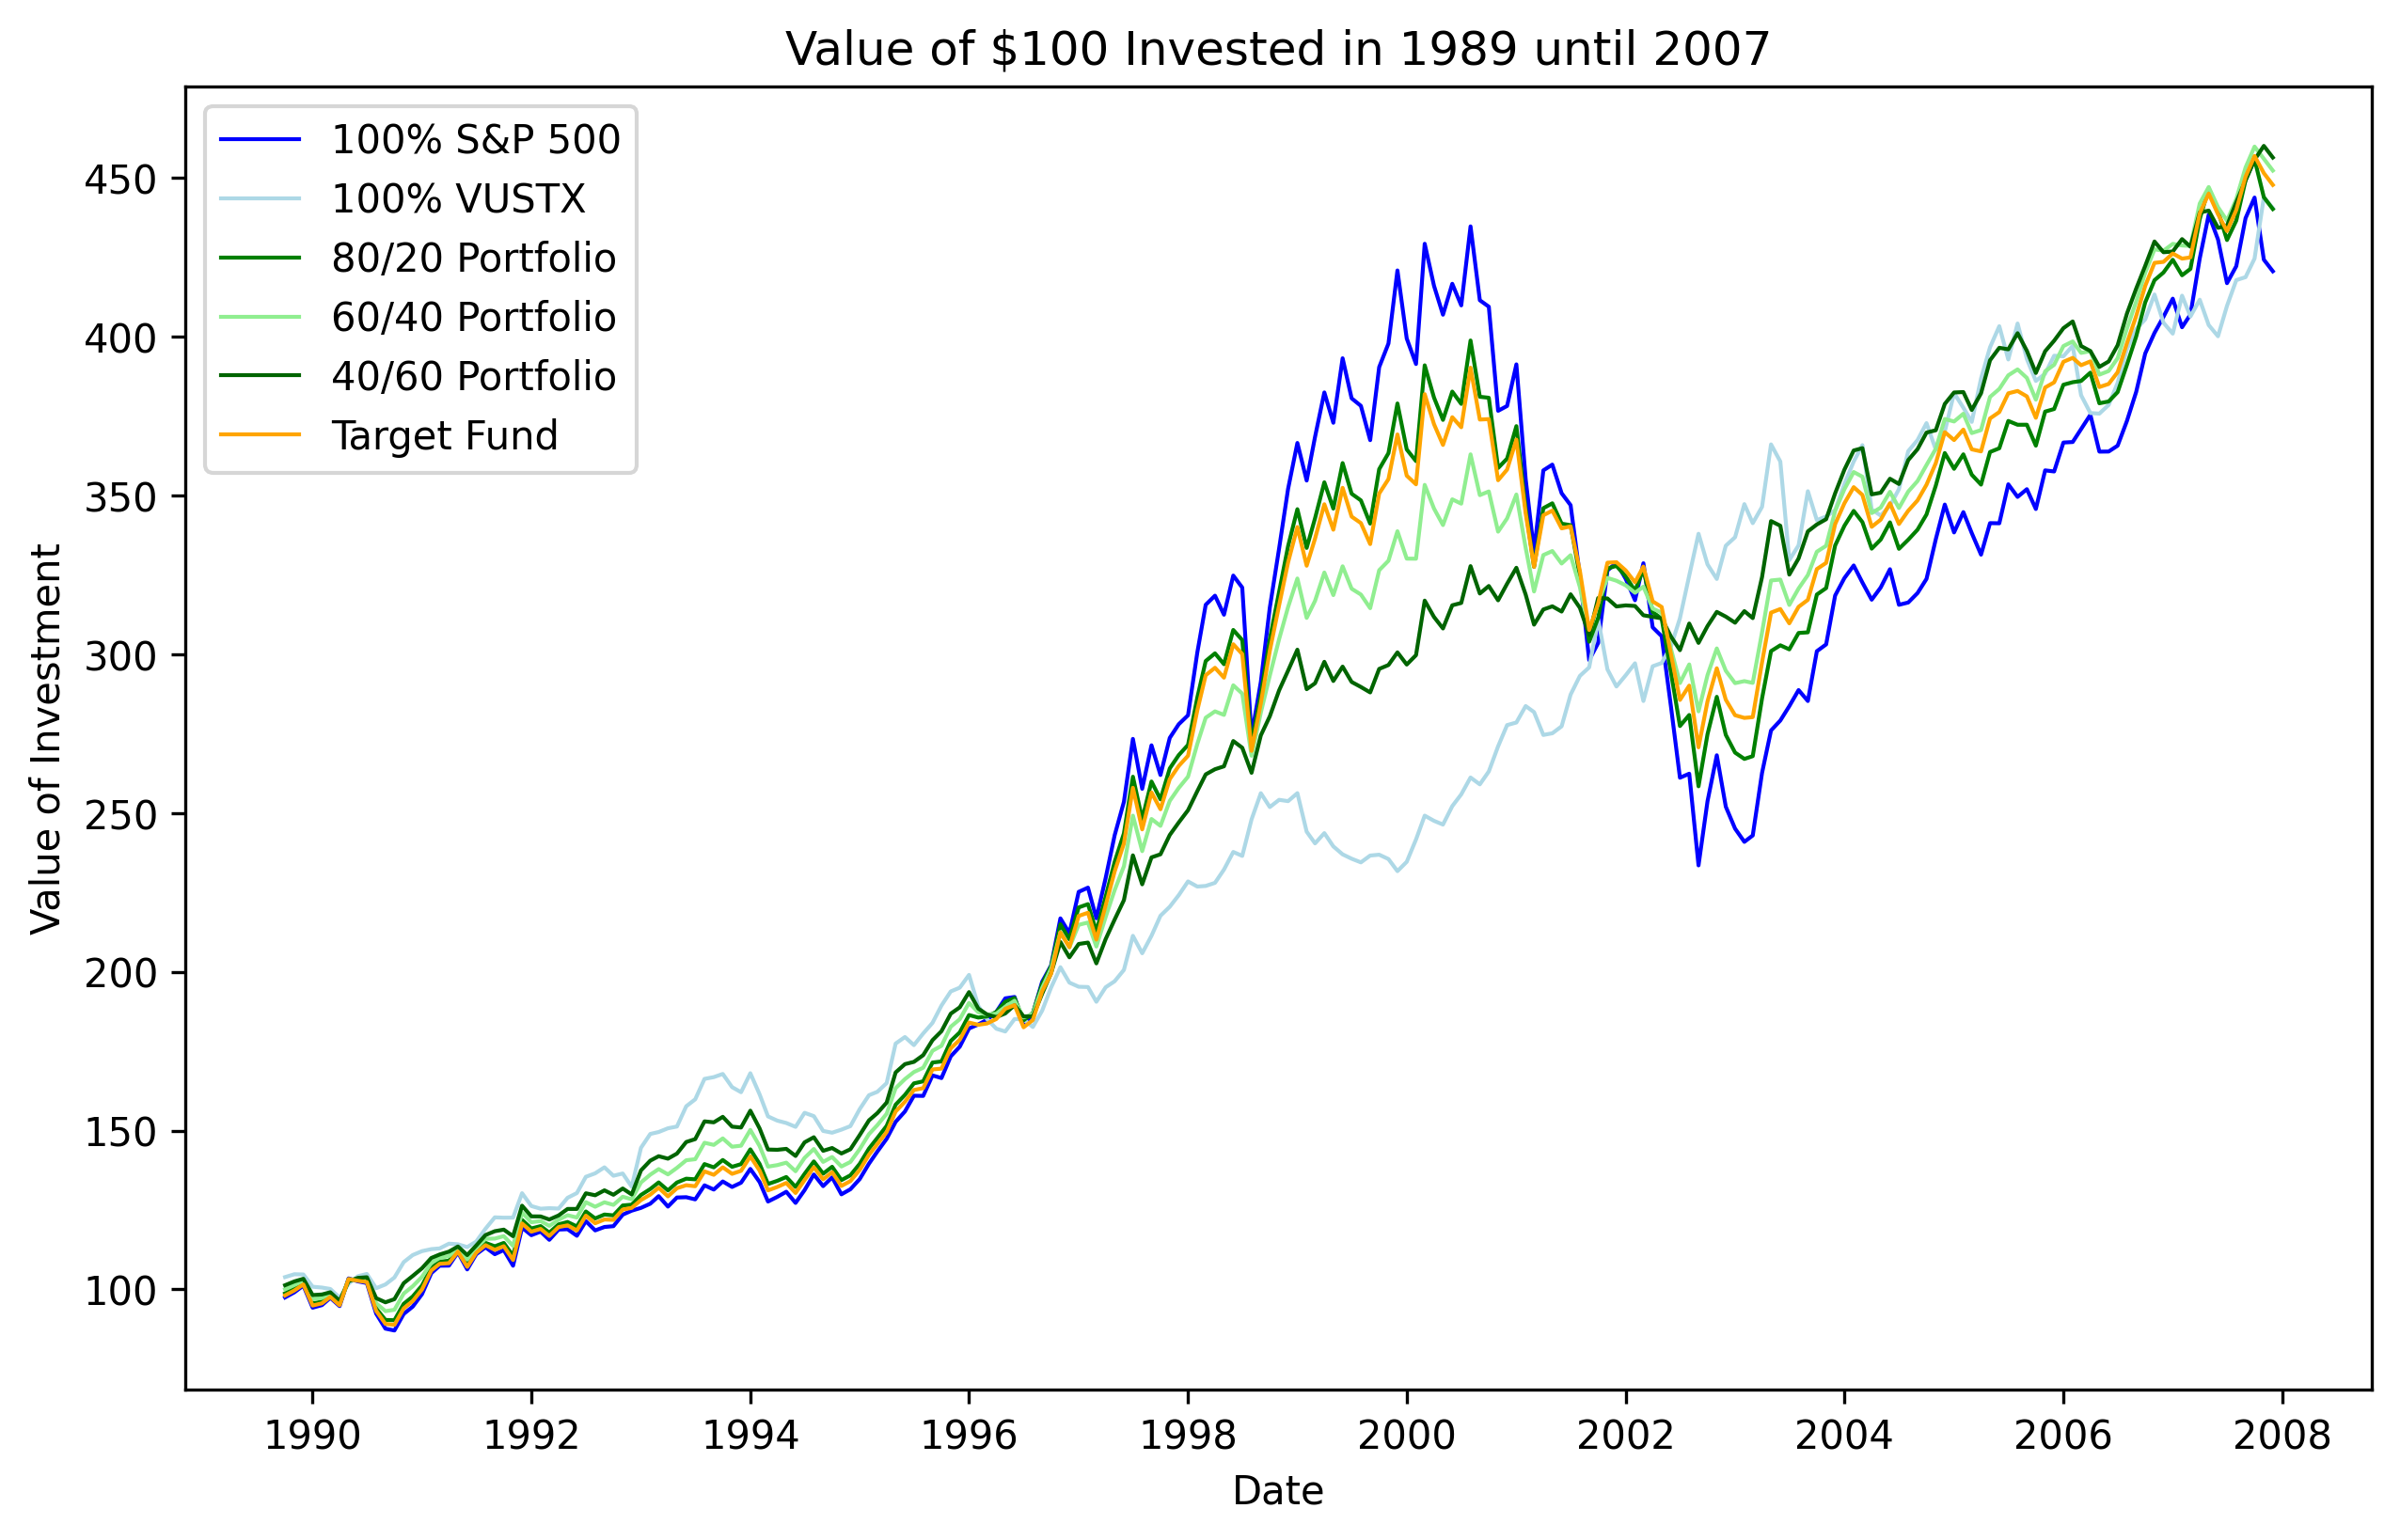

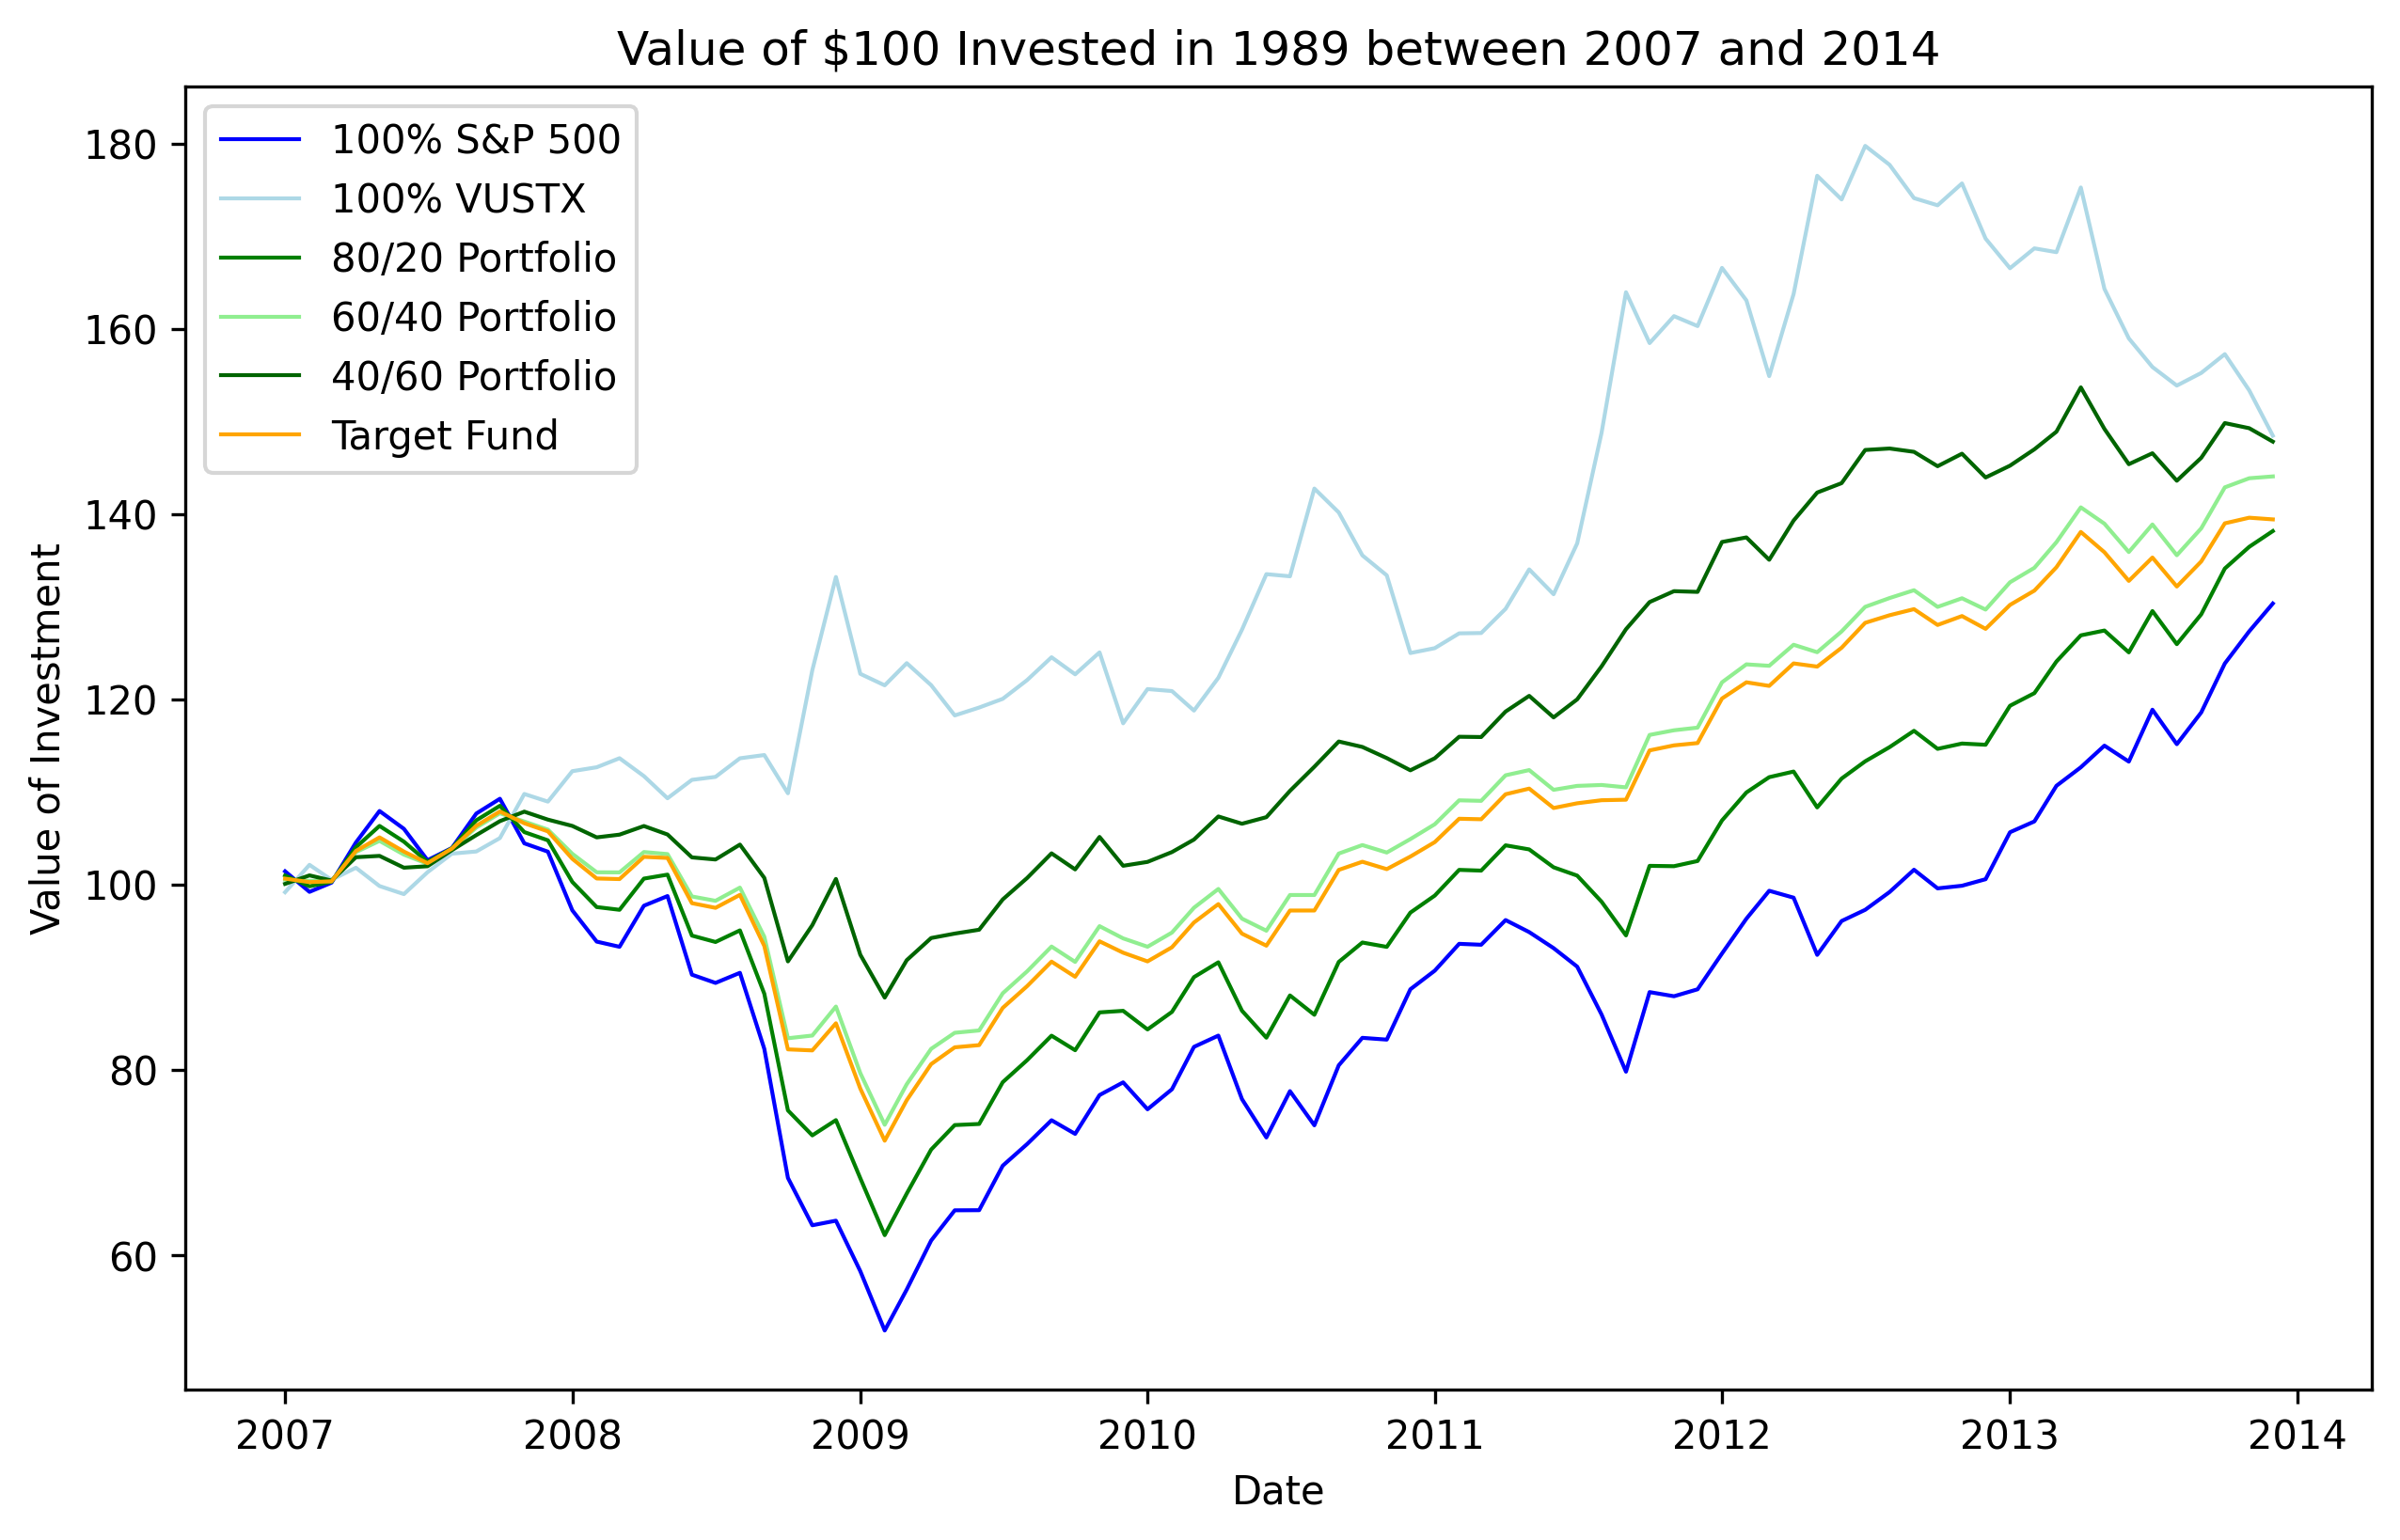

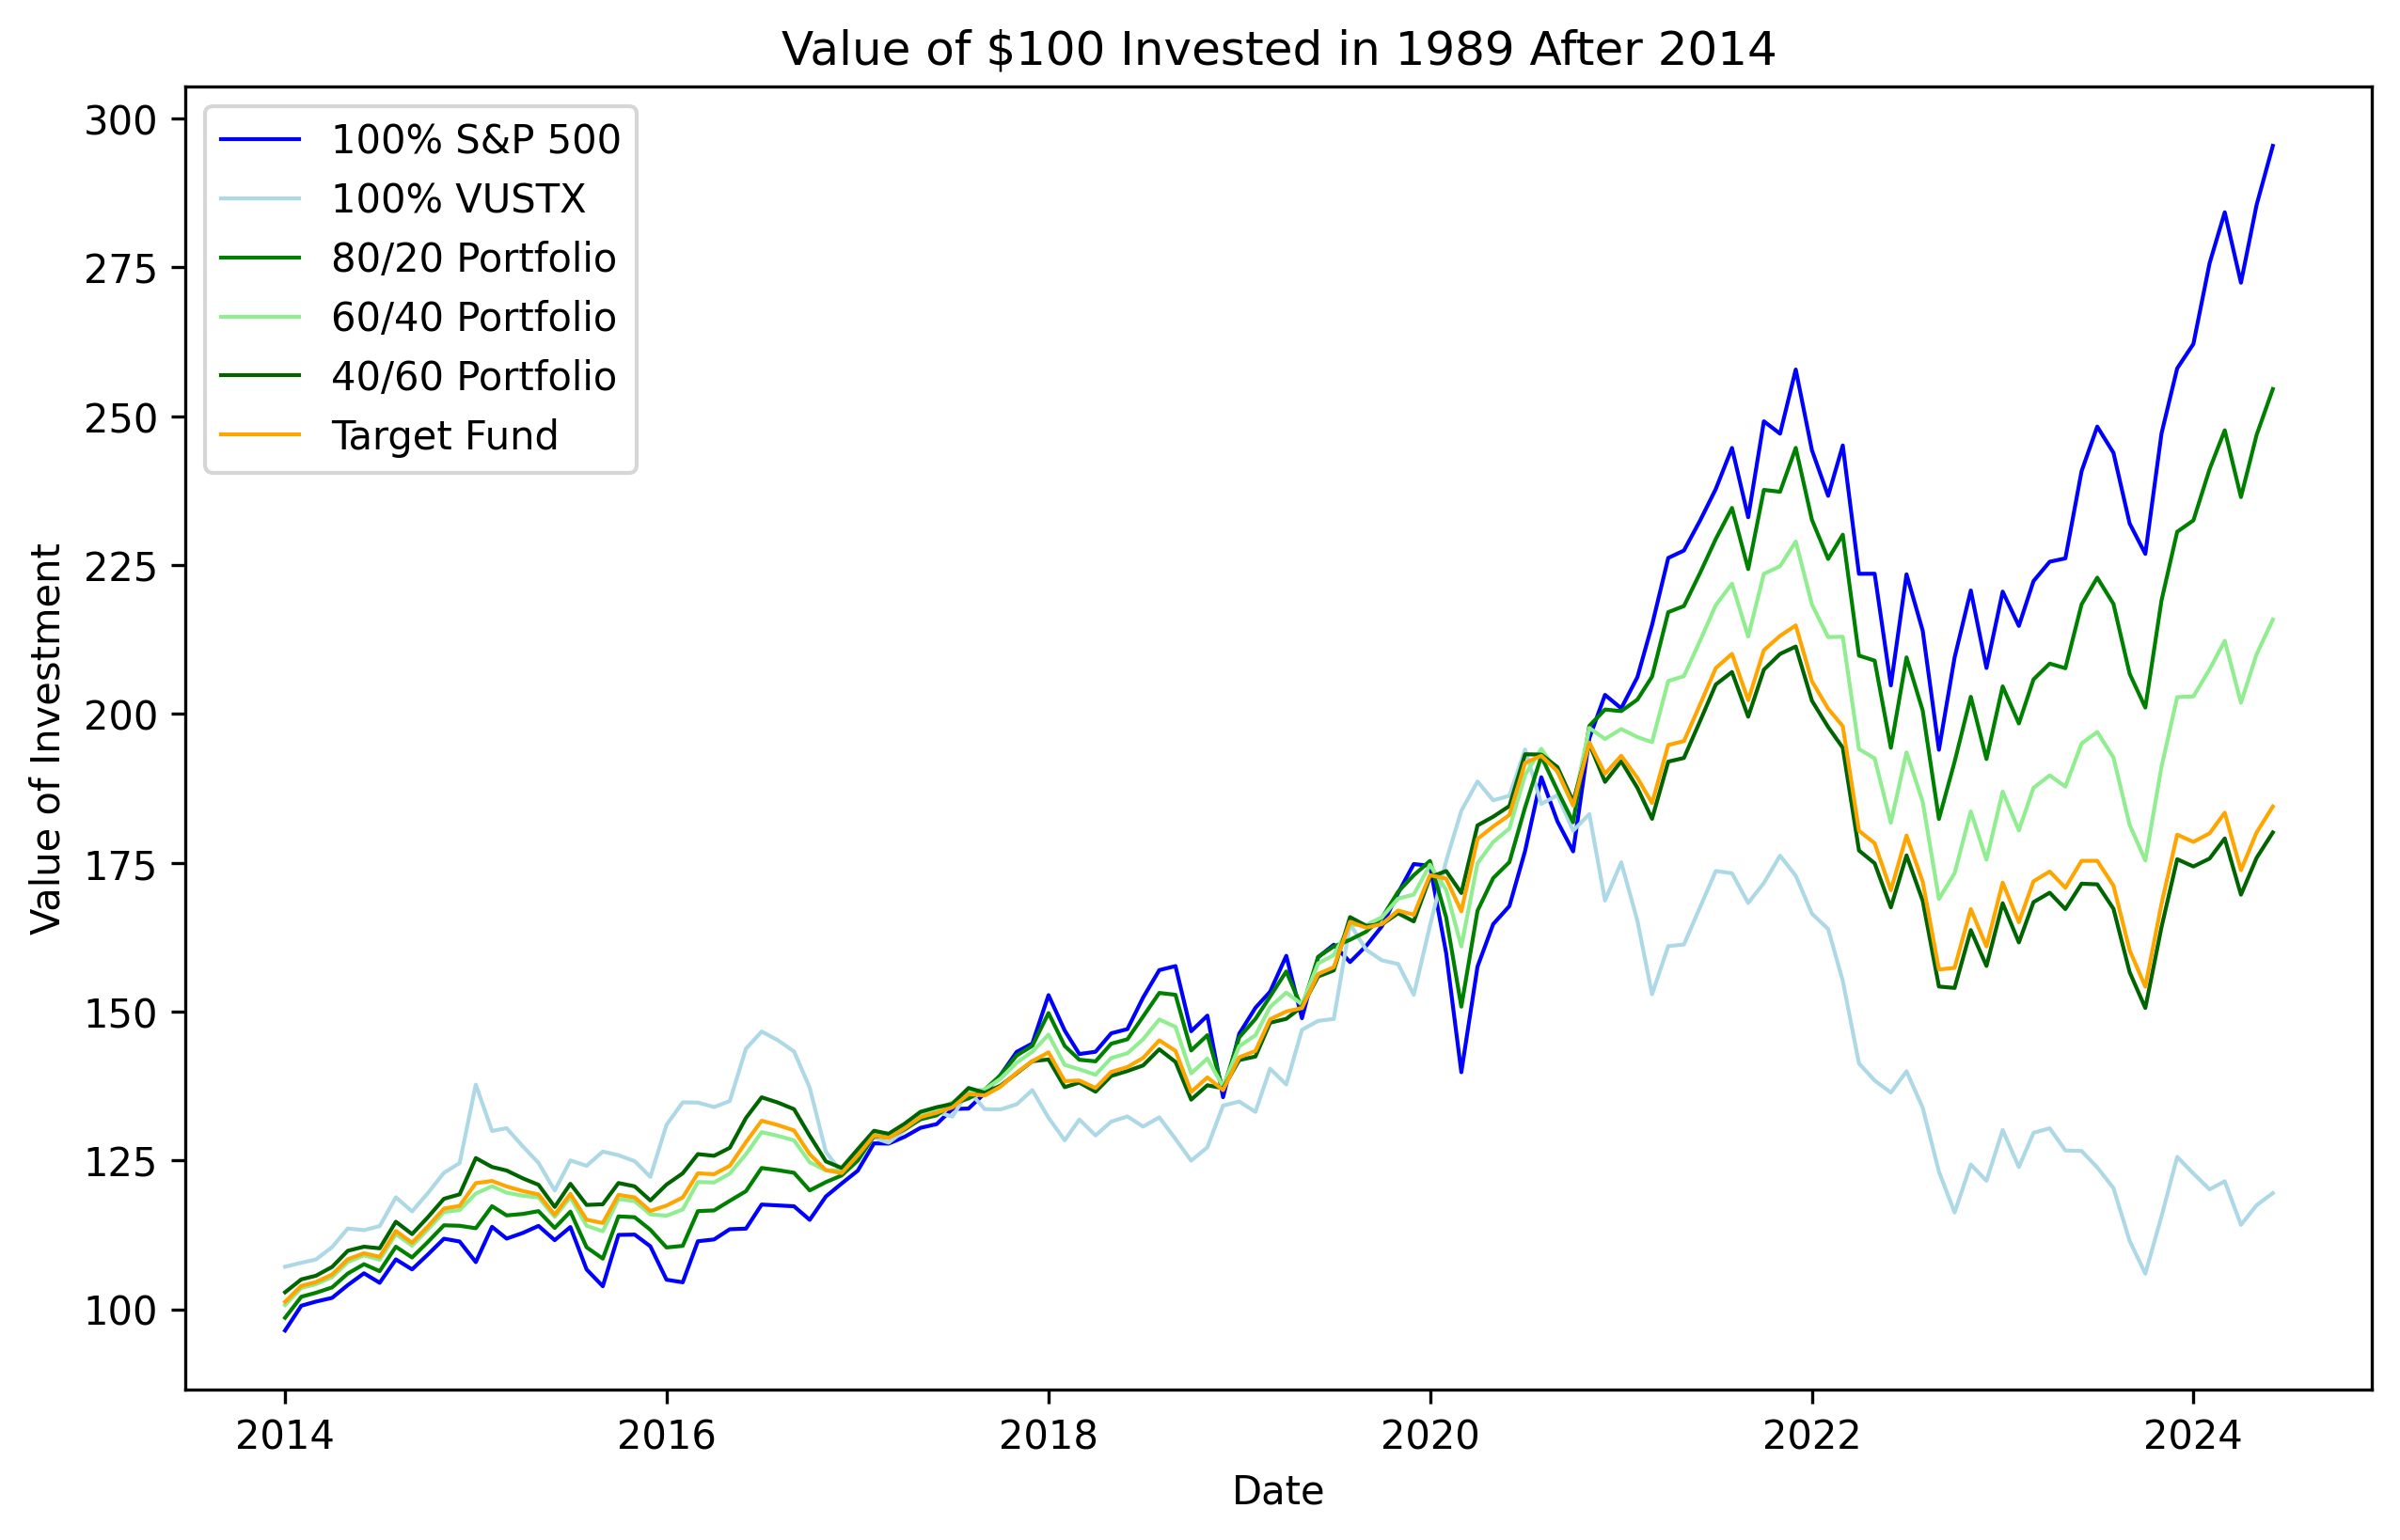

In [12]:
import sys
import subprocess
import importlib
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Ensure packages are properly installed and imported
def install_and_import(package, alias=None):
    try:
        module = importlib.import_module(package)
    except ImportError:
        print(f"{package} not found. Installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} installed successfully.")
        module = importlib.import_module(package)
        
    if alias:
        globals()[alias] = module
    else:
        globals()[package] = module

install_and_import('yfinance', alias='yf')
yf = globals()['yf']

# Function to calculate volatility
def vol_s(x):
    x = np.array(x)
    n = len(x)
    x_bar = np.mean(x)
    stdev = np.sqrt(np.sum((x - x_bar)**2) / (n - 1))
    return stdev

# Annualize return
def annualize_return(x):
    return (1 + x)**12 - 1

# Define start and end dates
startdate = "1989-09-01"
startyear = startdate.split("-")[0]
end_date_vfinx = "2024-08-01"
end_date_gspix = "2024-07-01"

# Convert dates to datetime objects
startdate_dt = datetime.datetime.strptime(startdate, "%Y-%m-%d")
end_date_vfinx_dt = datetime.datetime.strptime(end_date_vfinx, "%Y-%m-%d")
end_date_gspix_dt = datetime.datetime.strptime(end_date_gspix, "%Y-%m-%d")

# Download S&P 500 data
SP500 = yf.download("^GSPC", start=startdate_dt, end=end_date_vfinx_dt, interval="1mo")

# Download VUST
VUSTX = yf.download("VUSTX", start=startdate_dt, end=end_date_gspix_dt, interval="1mo")

# Remove NA values
print("NaN values in SP500:")
print(SP500['Adj Close'].isna().sum())
print("NaN values in VUSTX:")
print(VUSTX['Adj Close'].isna().sum())

prices_data = pd.concat([SP500['Adj Close'], VUSTX['Adj Close']], axis=1, join='inner')
prices_data.columns = ['SP500', 'VUSTX']

# Calculate percentage returns
print("NaN values in SP500 pct change:")
print(SP500['Adj Close'].pct_change().isna().sum())
print("NaN values in VUSTX pct change:")
print(VUSTX['Adj Close'].pct_change().isna().sum())

SP500_returns = SP500['Adj Close'].pct_change().dropna()
VUSTX_returns = VUSTX['Adj Close'].pct_change().dropna() # do not calculate 

# Align both SP500_returns and VUSTX_returns by date
aligned_returns = pd.concat([SP500_returns, VUSTX_returns], axis=1, join='inner')
aligned_returns.columns = ['SP500', 'VUSTX']

aligned_returns['80/20 Portfolio'] = 0.8* aligned_returns['SP500'] + 0.2* aligned_returns['VUSTX']
aligned_returns['60/40 Portfolio'] = 0.6* aligned_returns['SP500'] + 0.4* aligned_returns['VUSTX']
aligned_returns['40/60 Portfolio'] = 0.4* aligned_returns['SP500'] + 0.6* aligned_returns['VUSTX']

# Target date fund allocation: 90% S&P and 10% Bonds to 40% S&P and 60% Bonds over 35 years
weight_date_row = (0.9 - 0.4) / (len(aligned_returns) - 1)
aligned_returns['Target Fund'] = 0

for i in range(len(aligned_returns)):
    new_value = aligned_returns.iloc[i]['SP500'] * (0.9 - weight_date_row * i) + \
                aligned_returns.iloc[i]['VUSTX'] * (0.1 + weight_date_row * i)
    
    aligned_returns.at[aligned_returns.index[i], 'Target Fund'] = new_value
    #print(0.9 - weight_date_row * i) 


# Plot cumulative returns
plt.figure(figsize=(10, 6), dpi=300)
plt.plot((1 + aligned_returns['SP500']).cumprod() * 100, label="100% S&P 500", linewidth=1, color='blue')
plt.plot((1 + aligned_returns['VUSTX']).cumprod() * 100, label="100% VUSTX", linewidth=1, color='lightblue')
plt.plot((1 + aligned_returns['80/20 Portfolio']).cumprod() * 100, label="80/20 Portfolio", linewidth=1, color='green')
plt.plot((1 + aligned_returns['60/40 Portfolio']).cumprod() * 100, label="60/40 Portfolio", linewidth=1, color='lightgreen')
plt.plot((1 + aligned_returns['40/60 Portfolio']).cumprod() * 100, label="40/60 Portfolio", linewidth=1, color='darkgreen')
plt.plot((1 + aligned_returns['Target Fund']).cumprod() * 100, label="Target Fund", linewidth=1, color='orange')


plt.title(f'Value of $100 Invested in {startyear} (Various Portfolios) (cumulative)')
plt.xlabel("Date")
plt.ylabel("Value of Investment")
plt.legend(loc="upper left")
plt.savefig('./portfolio_cumulative_returns.jpg')

plt.show()


# Plots splitting date into 3 periods

def plot_period_with_monthly_index(aligned_returns_period, title):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot((1 + aligned_returns_period['SP500']).cumprod() * 100, label="100% S&P 500", linewidth=1, color='blue')
    plt.plot((1 + aligned_returns_period['VUSTX']).cumprod() * 100, label="100% VUSTX", linewidth=1, color='lightblue')
    plt.plot((1 + aligned_returns_period['80/20 Portfolio']).cumprod() * 100, label="80/20 Portfolio", linewidth=1, color='green')
    plt.plot((1 + aligned_returns_period['60/40 Portfolio']).cumprod() * 100, label="60/40 Portfolio", linewidth=1, color='lightgreen')
    plt.plot((1 + aligned_returns_period['40/60 Portfolio']).cumprod() * 100, label="40/60 Portfolio", linewidth=1, color='darkgreen')
    plt.plot((1 + aligned_returns_period['Target Fund']).cumprod() * 100, label="Target Fund", linewidth=1, color='orange')

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value of Investment")
    plt.legend(loc="upper left")
    plt.show()


before_2007_monthly = aligned_returns[:'2007']
between_2007_2014_monthly = aligned_returns['2007':'2013']
after_2014_monthly = aligned_returns['2014':]

plot_period_with_monthly_index(before_2007_monthly, 'Value of $100 Invested in 1989 until 2007')
plot_period_with_monthly_index(between_2007_2014_monthly, 'Value of $100 Invested in 1989 between 2007 and 2014')
plot_period_with_monthly_index(after_2014_monthly, 'Value of $100 Invested in 1989 After 2014')



The five portfolios demonstrate similar long-term growth patterns, with the S&P 500 delivering the highest overall returns but also exhibiting greater volatility. As anticipated, the bond-heavy VUSTX portfolio offers stability, particularly during market downturns, but lags in performance during growth periods. As expected, the mixed portfolios strike a balance between risk and return, providing moderate growth with lower volatility compared to the S&P 500, translating into reduced risk for a smoother performance.

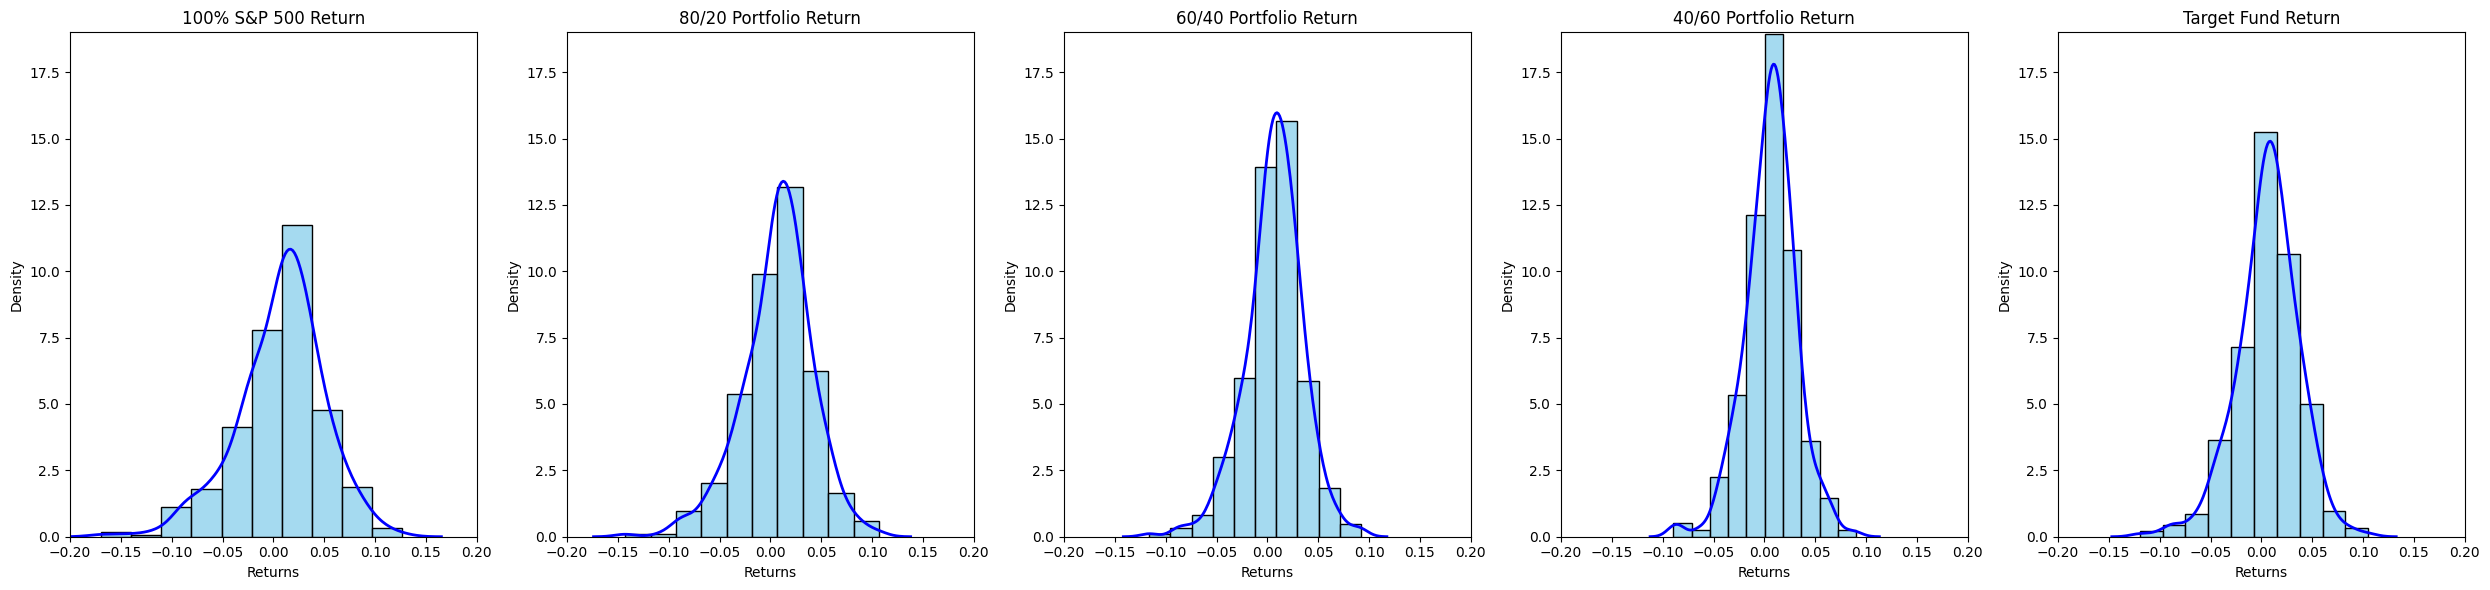

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 5 subplots
fig, ax = plt.subplots(1, 5, figsize=(25, 6))  # Adjusted figsize for better display of 5 plots

# Histogram and Density for 100% S&P 500
sns.histplot(aligned_returns['SP500'], bins=10, kde=False, ax=ax[0], color='skyblue', stat='density')
ax[0].set_xlim(-0.2, 0.2)
ax[0].set_ylim(0, 19)
ax[0].set_xlabel("Returns")
ax[0].set_title("100% S&P 500 Return")
sns.kdeplot(aligned_returns['SP500'], ax=ax[0], color='blue', linewidth=2)

# Histogram and Density for 80/20 Portfolio
sns.histplot(aligned_returns['80/20 Portfolio'], bins=10, kde=False, ax=ax[1], color='skyblue', stat='density')
ax[1].set_xlim(-0.2, 0.2)
ax[1].set_ylim(0, 19)
ax[1].set_xlabel("Returns")
ax[1].set_title("80/20 Portfolio Return")
sns.kdeplot(aligned_returns['80/20 Portfolio'], ax=ax[1], color='blue', linewidth=2)

# Histogram and Density for 60/40 Portfolio
sns.histplot(aligned_returns['60/40 Portfolio'], bins=10, kde=False, ax=ax[2], color='skyblue', stat='density')
ax[2].set_xlim(-0.2, 0.2)
ax[2].set_ylim(0, 19)
ax[2].set_xlabel("Returns")
ax[2].set_title("60/40 Portfolio Return")
sns.kdeplot(aligned_returns['60/40 Portfolio'], ax=ax[2], color='blue', linewidth=2)

# Histogram and Density for 40/60 Portfolio
sns.histplot(aligned_returns['40/60 Portfolio'], bins=10, kde=False, ax=ax[3], color='skyblue', stat='density')
ax[3].set_xlim(-0.2, 0.2)
ax[3].set_ylim(0, 19)
ax[3].set_xlabel("Returns")
ax[3].set_title("40/60 Portfolio Return")
sns.kdeplot(aligned_returns['40/60 Portfolio'], ax=ax[3], color='blue', linewidth=2)

# Histogram and Density for Target Fund
sns.histplot(aligned_returns['Target Fund'], bins=10, kde=False, ax=ax[4], color='skyblue', stat='density')
ax[4].set_xlim(-0.2, 0.2)
ax[4].set_ylim(0, 19)
ax[4].set_xlabel("Returns")
ax[4].set_title("Target Fund Return")
sns.kdeplot(aligned_returns['Target Fund'], ax=ax[4], color='blue', linewidth=2)

# Show the plot
plt.tight_layout()
plt.show()



*   **Volatility**: The 100% S&P 500 portfolio exhibits the most volatility, while portfolios with more bond exposure (40/60 and the Target Fund) show more stability and narrower return distributions.
*   **Risk-Return Trade-Off**: The riskier portfolios (S&P 500 and 80/20) offer the potential for higher returns but also expose investors to greater losses. On the other hand, the more conservative portfolios (60/40, 40/60, and Target Fund) offer more consistent but lower returns, better suited for risk-averse investors.
*   **Balanced Approach:** Portfolios with a mix of bonds and equities (like the 80/20 or 60/40 portfolios) attempt to balance risk and return, offering a compromise between high volatility and steady growth.

Overall, the histograms demonstrate the trade-off between higher-return portfolios, like the 100% S&P 500, which come with greater volatility, and more conservative portfolios with bond exposure that offer stability and lower returns. Investors must align their portfolio choices with their risk tolerance and long-term financial goals, balancing potential gains against exposure to market fluctuations.
olios with a mix of bonds and equities (like the 80/20 or 60/40 portfolios) attempt to balance risk and return, offering a compromise between high volatility and steady growth. Target Fund's return and volatility lies between 80/20 and 60/40 porfolios (based from the first glance at histograms).

### 1. **Standard Deviation (Volatility)**

The standard deviation of returns is calculated as:

$$
\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (r_i - \bar{r})^2}
$$

Where:
- $ \sigma $ = Standard deviation
- $ r_i $ = Return in period \(i\)
- $ \bar{r} $ = Average return
- $ n $ = Number of observations

---

### 2. **Skewness**

Skewness measures the asymmetry of the return distribution around the mean:

$$
\text{Skewness} = \frac{\frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^3}{\left( \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2 \right)^{3/2}}
$$

Where:
- $ \bar{r} $ = Average return
- $ r_i $ = Return in period \(i\)
- $ n $ = Number of observations

---

### 3. **Kurtosis**

Kurtosis measures the "tailedness" of the return distribution:

$$
\text{Kurtosis} = \frac{\frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^4}{\left( \frac{1}{n} \sum_{i=1}^{n} (r_i - \bar{r})^2 \right)^2}
$$

Where:
- $ \bar{r} $ = Average return
- $ r_i $ = Return in period \(i\)
- $ n $ = Number of observations

---

### 4. **Value at Risk (VaR)**

The Value at Risk at a confidence level \( \alpha \) is defined as:

$$
\text{VaR}_\alpha = -\text{Quantile}_\alpha(r)
$$

Where:
- $ \alpha $ = Confidence level (e.g., 95% or 99%)
- $ r $ = Return distribution

At a 95% confidence level:

$$
\text{VaR}_{95\%} = - \text{Quantile}_{0.05}(r)
$$


In [19]:

# Calculate Standard Deviation
std_dev = aligned_returns.std()

# Calculate Skewness
skewness = aligned_returns.skew()

# Calculate Kurtosis
kurtosis = aligned_returns.kurtosis()

# Function to calculate VaR at a given confidence level
def calculate_var(returns, confidence_level=0.95):
    return returns.quantile(1 - confidence_level)

# Calculate VaR for each portfolio at 95% confidence level
var_95 = aligned_returns.apply(calculate_var, confidence_level=0.95)

# Combine all metrics into one DataFrame
summary_table = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'VaR (95%)': var_95
})

# Display the table
print("Summary of Portfolio Metrics with VaR:")
print(round(summary_table, 3))




Summary of Portfolio Metrics with VaR:
                 Standard Deviation  Skewness  Kurtosis  VaR (95%)
SP500                         0.043    -0.542     0.994     -0.072
VUSTX                         0.032     0.169     1.040     -0.048
80/20 Portfolio               0.035    -0.508     1.138     -0.054
60/40 Portfolio               0.028    -0.457     1.409     -0.044
40/60 Portfolio               0.025    -0.342     1.412     -0.036
Target Fund                   0.031    -0.440     1.270     -0.046


- **Volatility (Standard Deviation)**: 
    - The S&P 500 exhibits the highest standard deviation (**0.0428**), reflecting its higher risk and more substantial price fluctuations compared to other portfolios.
    - As the bond allocation increases, volatility decreases, with the 40/60 Portfolio and VUSTX exhibiting the lowest standard deviations. 
    - This is consistent with the stabilizing effect of bonds, which reduce overall portfolio volatility.
    
- **Skewness**:
    - Most portfolios exhibit negative skewness, particularly the S&P 500 and equity-heavy portfolios (80/20, 60/40), indicating a higher likelihood of extreme negative returns (left-tail risk).
    - The VUSTX portfolio, being bond-heavy, is slightly positively skewed (**0.169**), suggesting a higher probability of small positive returns, aligning with bonds' safer, more stable behavior.

- **Kurtosis**:
    - The kurtosis values across all portfolios are greater than 1, indicating **leptokurtic** distributions, which are prone to occasional extreme returns, either positive or negative.
    - The higher kurtosis in mixed portfolios like 60/40 and 40/60 (above **1.4**) suggests a greater probability of extreme events compared to pure equity (S&P 500) and bond-heavy portfolios (VUSTX), meaning these portfolios are more susceptible to extreme positive or negative returns compared to pure equity or bond-heavy portfolios.

- **Value at Risk (VaR 95%)**:
    - The S&P 500 portfolio has the largest negative VaR (**-0.0719**), meaning an investor could expect to lose up to 7.19% in a bad month with 95% confidence.
    - The bond-heavy VUSTX portfolio has a much lower VaR (**-0.0481**), indicating a smaller potential downside.
    - Adding bonds to portfolios, like the 80/20, 60/40, and 40/60 portfolios, systematically reduces VaR, making them more suitable for risk-averse investors.

- **Tail Risk Management**:
    - Investors seeking to minimize tail risk would prefer portfolios with lower kurtosis and VaR, such as VUSTX, which provides stability during downturns.
    - The negative skewness of equity-heavy portfolios highlights the importance of considering downside risk when constructing portfolios with higher equity allocations.

- **Risk-Return Tradeoff and Skewness-Kurtosis Implications**:
    - The negative skewness and leptokurtic behavior of the S&P 500 and mixed portfolios suggest they are prone to sudden, sharp losses (left-tail risk).

Next, we plot the rollling average mean and volatility.

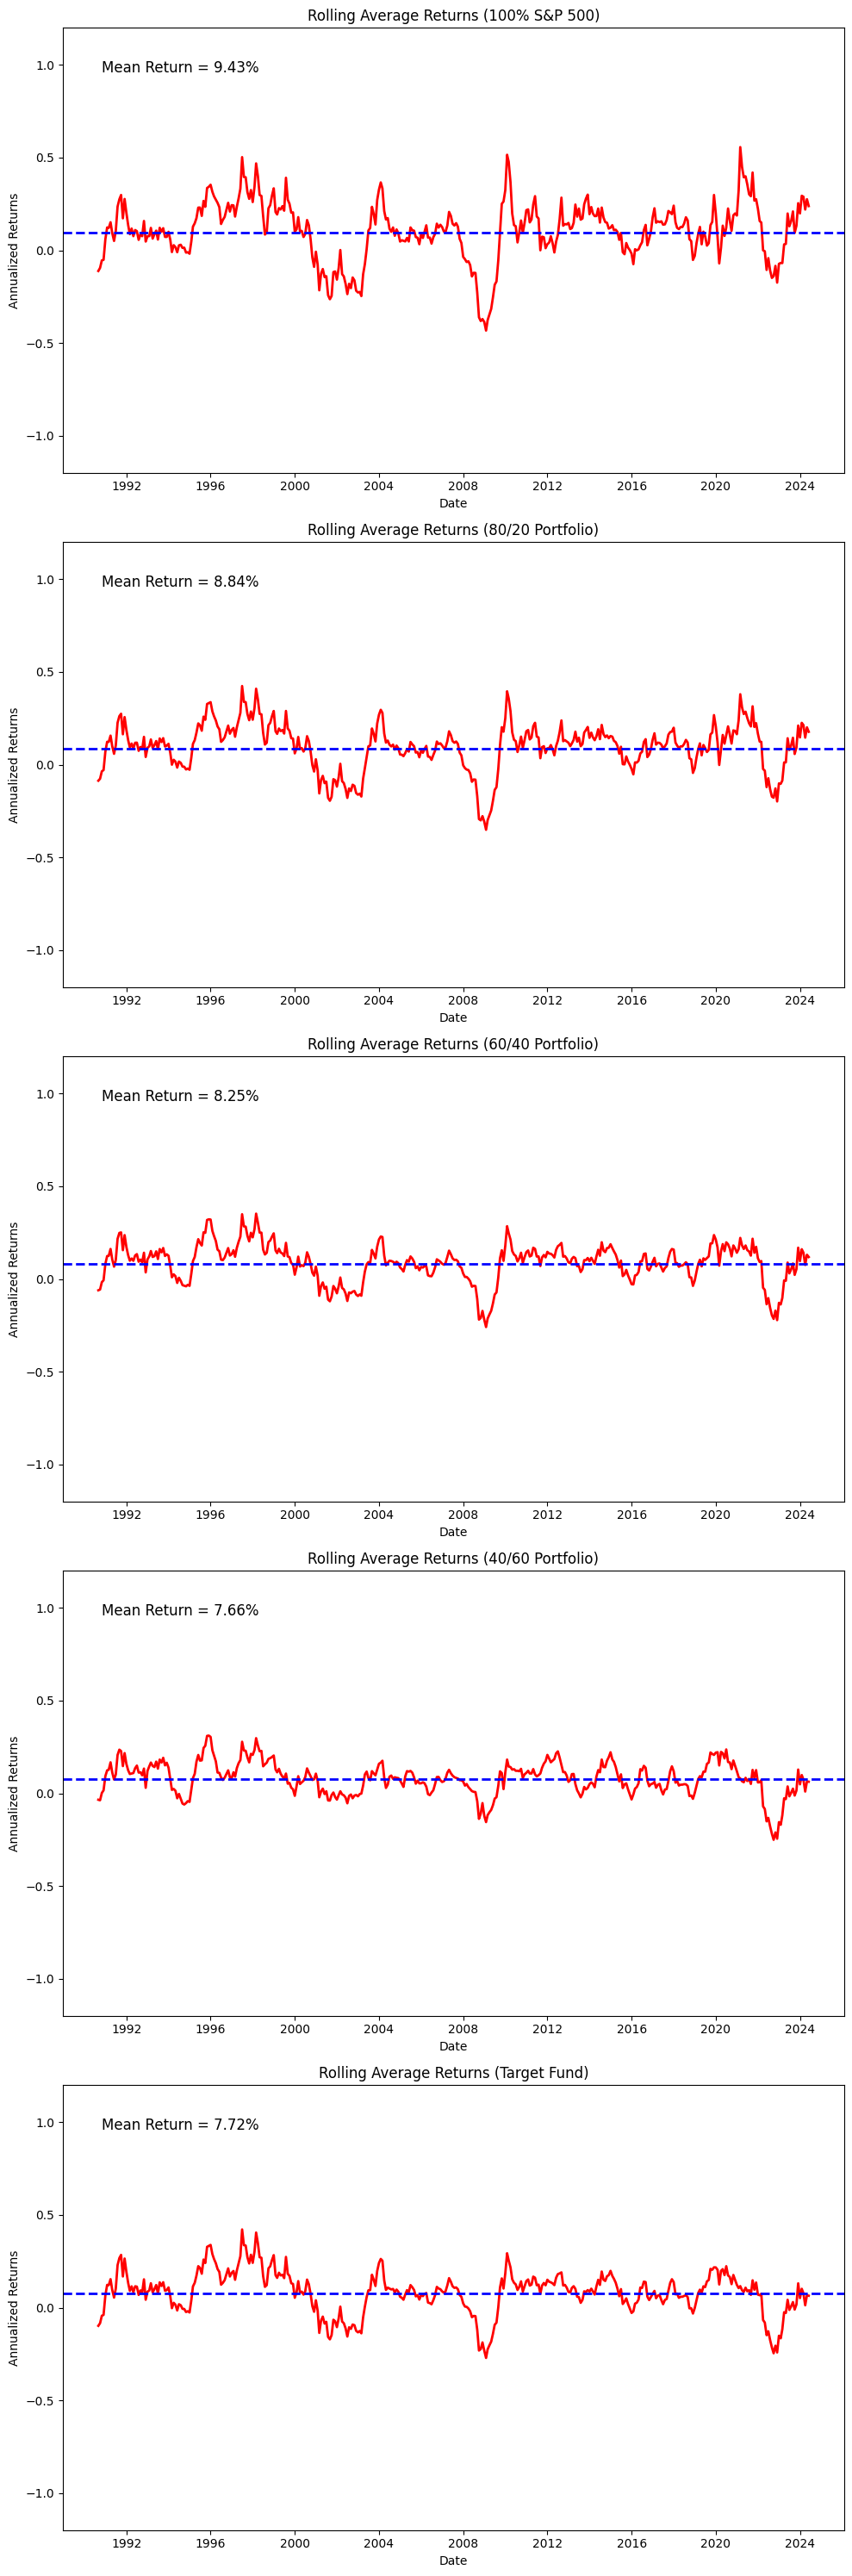

In [15]:
# Create a figure with multiple subplots (one for each portfolio), each in its own row

portfolios = {
    'SP500': "100% S&P 500",
    '80/20 Portfolio': "80/20 Portfolio",
    '60/40 Portfolio': "60/40 Portfolio",
    '40/60 Portfolio': "40/60 Portfolio",
    'Target Fund': "Target Fund"
}

fig, ax = plt.subplots(len(portfolios), 1, figsize=(10, 30))

rollmean = aligned_returns.rolling(window=12).mean()
annualized_rollmean = (1 + rollmean)**12 - 1

# Loop through the portfolios to plot each
for i, (key, title) in enumerate(portfolios.items()):
    # Plot rolling average returns
    ax[i].plot(annualized_rollmean[key], color='red', linewidth=2)
    ax[i].set_title(f"Rolling Average Returns ({title})")
    ax[i].set_ylim(-1.2, 1.2)
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Annualized Returns")

    # Calculate and plot the mean return as a horizontal line
    annualized_mean = annualize_return(aligned_returns[key].mean()) 
    ax[i].axhline(y=annualized_mean, color='blue', linestyle='--', linewidth=2)
    ax[i].text(0.05, 0.9, f"Mean Return = {round(annualized_mean*100, 2)}%", 
               transform=ax[i].transAxes, color='black', fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()

# Display the plot
plt.show()


**Rolling Average Returns: Long-Term Growth**

The S&P 500 boasts a mean return of 9.43%, showing strong long-term growth, but also significant fluctuations during downturns like 2000 and 2008. The 80/20 Portfolio offers a slightly lower return of 8.84% but with less volatility, striking a good balance between growth and risk. The 60/40 Portfolio, with a mean return of 8.25%, is more conservative, providing smoother performance with less fluctuation. The 40/60 Portfolio yields 7.66%, offering the most stability with smaller fluctuations, ideal for risk-averse investors. The Target Fund shows a return of 7.72%, providing balance by gradually shifting to safer assets over time.

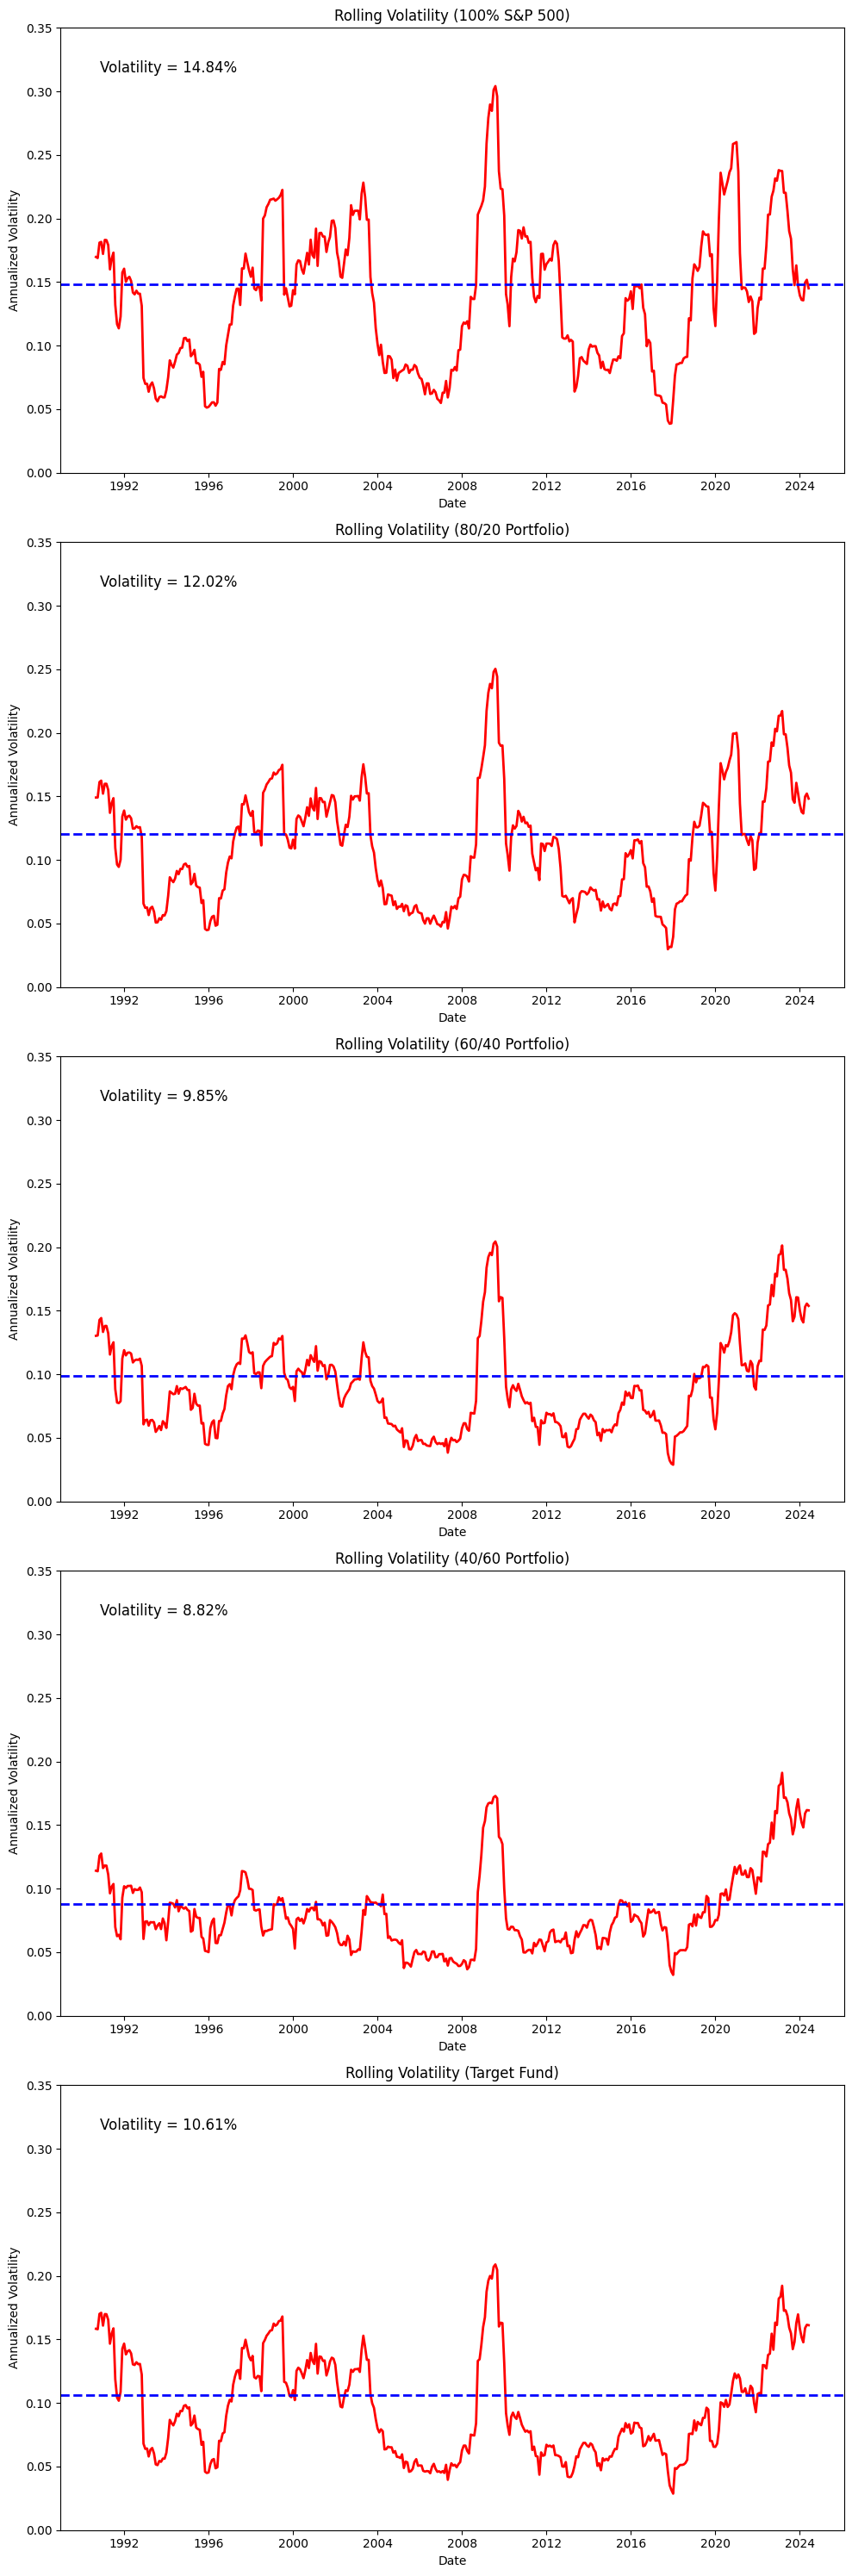

In [16]:
# Create a figure with multiple subplots (one for each portfolio), each in its own row
fig, ax = plt.subplots(len(portfolios), 1, figsize=(10, 30))  # 5 rows, 1 column

# Calculate the 12-month rolling annualized standard deviation
rollvol = aligned_returns.rolling(window=12).apply(vol_s, raw=True)

# Annualize the rolling volatility
annualized_rollvol = rollvol * np.sqrt(12)

# Loop through the portfolios to plot each
for i, (key, title) in enumerate(portfolios.items()):
    # Plot rolling annualized volatility
    ax[i].plot(annualized_rollvol[key], color='red', linewidth=2)
    ax[i].set_title(f"Rolling Volatility ({title})")
    ax[i].set_ylim(0, 0.35)
    ax[i].set_xlabel("Date")
    ax[i].set_ylabel("Annualized Volatility")

    # Calculate and plot the mean volatility as a horizontal line
    annualized_vol = vol_s(aligned_returns[key]) * np.sqrt(12)
    ax[i].axhline(y=annualized_vol, color='blue', linestyle='--', linewidth=2)
    ax[i].text(0.05, 0.9, f"Volatility = {round(annualized_vol*100, 2)}%", transform=ax[i].transAxes, color='black', fontsize=12)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


**Rolling Volatility: Risk Exposure**

The S&P 500 has the highest volatility at 14.84%, confirming its high-risk, high-reward nature. The 80/20 Portfolio is less volatile at 12.02%, offering stability with growth potential. The 60/40 Portfolio reduces risk further, with volatility at 9.85%, while the 40/60 Portfolio exhibits the lowest volatility at 8.82%, prioritizing risk reduction. The Target Fund has a moderate volatility of 10.61%, reflecting its balanced approach as it nears the target date of betting minium in S&P500.

**Conclusion: Balancing Risk and Return**

The S&P 500 offers the highest returns but with substantial volatility. The 80/20 and 60/40 portfolios provide a balanced risk-return profile, while the 40/60 Portfolio and Target Fund focus on stability with lower returns. Investors must choose based on their risk tolerance and financial goals, as higher equity allocations lead to better growth but greater risk.

Last, we calculate **Annualized Return (%), Annualized Volatility (%), Max Drawdown (%), Sharpe Ratio** based on these formulae:

### 1. **Annualized Return (%):**
The annualized return is calculated as:

$$
\text{Annualized Return} = \left( \prod_{i=1}^{n} (1 + r_i) \right)^{\frac{252}{n}} - 1
$$

Where:
- $ r_i $ = Daily return
- $ n $ = Number of days
- 252 represents the number of trading days in a year.

---

### 2. **Annualized Volatility (%):**
The annualized volatility is the standard deviation of returns, adjusted for the number of trading days:

$$
\text{Annualized Volatility} = \sigma_{\text{daily}} \times \sqrt{252}
$$

Where:
- $ \sigma_{\text{daily}} $ = Daily standard deviation of returns
- 252 represents the number of trading days in a year.

---

### 3. **Max Drawdown (%):**
Maximum drawdown measures the largest peak-to-trough decline in portfolio value:

$$
\text{Max Drawdown} = \min \left( \frac{P_t - P_{\text{peak}}}{P_{\text{peak}}} \right)
$$

Where:
- $ P_t $ = Portfolio value at time $ t $
- $ P_{\text{peak}} $ = Previous peak value of the portfolio.

---

### 4. **Sharpe Ratio:**
The Sharpe ratio measures the risk-adjusted return of a portfolio:

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$

Where:
- $ R_p $ = Annualized portfolio return
- $ R_f $ = Risk-free rate (can be assumed 0 if not specified)
- $ \sigma_p $ = Annualized portfolio volatility.


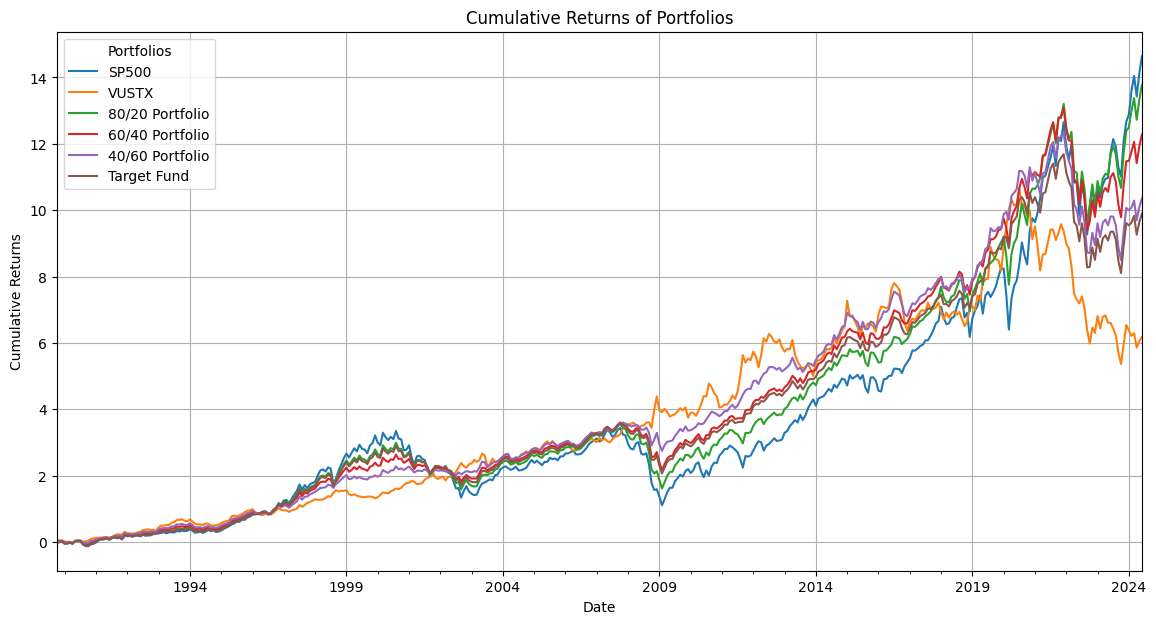

Summary of Portfolio Performance Metrics:


,Annualized Return (%),Annualized Volatility (%),Max Drawdown (%),Sharpe Ratio
SP500,190.04,68.00,-52.56,2.79
VUSTX,132.32,51.16,-45.38,2.59
80/20 Portfolio,178.50,55.07,-42.73,3.24
60/40 Portfolio,166.96,45.12,-31.23,3.70
40/60 Portfolio,155.41,40.43,-28.73,3.84
Target Fund,156.56,48.61,-32.95,3.22


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative returns
cumulative_returns = (1 + aligned_returns).cumprod() - 1

# Calculate annualized average returns (Assuming 252 trading days)
annualized_returns = aligned_returns.mean() * 252

# Calculate annualized volatility (Assuming 252 trading days)
annualized_volatility = aligned_returns.std() * np.sqrt(252)

# Calculate maximum drawdown
rolling_max = (1 + aligned_returns).cumprod().cummax()
daily_drawdown = (1 + aligned_returns).cumprod() / rolling_max - 1
max_drawdown = daily_drawdown.min()

# Calculate Sharpe Ratio (assuming risk-free rate = 0)
sharpe_ratio = annualized_returns / annualized_volatility

# Combine all the calculated metrics into a single DataFrame
summary_table = pd.DataFrame({
    'Annualized Return (%)': annualized_returns * 100,
    'Annualized Volatility (%)': annualized_volatility * 100,
    'Max Drawdown (%)': max_drawdown * 100,
    'Sharpe Ratio': sharpe_ratio
})

# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 7))
plt.title('Cumulative Returns of Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(title="Portfolios")
plt.grid(True)
plt.show()

# Display the summary table
print("Summary of Portfolio Performance Metrics:")
display(round(summary_table, 2))


- **Annualized Returns: Assessing Growth Potential**
    - The **S&P 500** achieves the highest annualized return at **1.90**, confirming its role as the top-performing portfolio in terms of growth. This high return reflects the potential for strong equity-driven gains over time.
    - The **80/20 Portfolio** follows closely with a return of **1.78**, offering a good mix of growth and stability by incorporating bonds into its allocation.
    - The **60/40 Portfolio** (**1.67%**) and **40/60 Portfolio** (**1.55%**) show progressively lower returns as bond exposure increases, reducing growth potential but offering more consistency.
    - The **Target Fund** stands at **1.57%**, striking a balance between moderate returns and reduced risk.
    - **VUSTX**, with a return of **1.32%**, reflects the lowest growth, focusing on minimizing risk through its bond-heavy structure.

- **Annualized Volatility: Measuring Risk**
    - The **S&P 500** shows the highest annualized volatility at **0.68**, reinforcing its high-risk, high-reward nature.
    - The **80/20 Portfolio** reduces this risk slightly, with volatility at **0.55**, offering more stability while maintaining growth potential.
    - The **60/40 Portfolio** (**0.45%**) and **40/60 Portfolio** (**0.40%**) provide progressively lower volatility, making them more attractive to risk-averse investors.
    - The **Target Fund** (**0.49%**) and **VUSTX** (**0.51%**) maintain lower volatility, prioritizing capital preservation and stability over aggressive growth.

- **Maximum Drawdown: Managing Losses**
    - The **S&P 500** experiences the largest maximum drawdown at **-0.53**, highlighting its vulnerability during major market downturns.
    - The **80/20 Portfolio** sees significant drawdowns at **-0.43**, though bond exposure cushions losses somewhat.
    - The **60/40 Portfolio** (**-0.31%**) and **40/60 Portfolio** (**-0.29%**) experience smaller drawdowns, reflecting their more conservative approach to risk.
    - **VUSTX**, with a drawdown of **-0.45%**, still faces notable losses despite its bond-heavy allocation.
    - The **Target Fund** has a moderate drawdown of **-0.33%**, consistent with its gradual shift toward conservative investments as it nears the target date.

- **Conclusion: Balancing Risk and Return**
    - The **S&P 500** provides the highest returns but also comes with the most volatility and steepest drawdowns, making it best suited for investors with a high-risk tolerance.
    - The **80/20 Portfolio** offers a more balanced approach, delivering strong returns with somewhat lower risk.
    - The **60/40 Portfolio** and **40/60 Portfolio** continue to reduce volatility and drawdowns, prioritizing stability over growth.
    - **VUSTX** and the **Target Fund** focus primarily on minimizing risk and volatility, ideal for investors seeking capital preservation with lower returns.

- **Overall**: Portfolios with higher equity exposure deliver better growth but also face higher volatility and deeper losses during market downturns, while bond-heavy portfolios provide more stable, consistent performance with limited growth.


## b-c) **Portfolio Recommendation for a 30-Year-Old U.S. Investor Saving for Retirement**

For a 30-year-old investor with a long-term horizon of 35 years until retirement, the **80/20 Portfolio** is recommended. This portfolio offers a **balance between growth potential and stability**, with an **annualized return of 1.78%** and **moderate volatility of 0.55%**. The higher equity exposure enables the investor to benefit from market growth over the long term, while the bond allocation provides a cushion during periods of market downturn.

- **Growth Potential:** With equities comprising **80%** of the portfolio, it allows the investor to capitalize on stock market growth, a critical factor for accumulating wealth over a long investment period.
- **Risk Tolerance:** At **30 years old**, the investor is able to take on higher risk, with sufficient time to recover from short-term market volatility.

- **Volatility Management:** The **bond allocation** helps to moderate the overall volatility of the portfolio, ensuring that it is not fully exposed to market crashes, as demonstrated by the **maximum drawdown of -0.43%**, which is lower than the S&P 500’s **-0.53%**.

### **Recommendation for a 60-Year-Old Investor**

For a **60-year-old investor**, the **40/60 Portfolio** is recommended. With only **5 years remaining** until retirement, the emphasis should shift toward **capital preservation** and reducing risk exposure.

- **Stability:** The **40/60 Portfolio** exhibits an **annualized volatility of 0.40%**, significantly lower than portfolios with greater equity exposure. This helps protect against substantial losses as retirement approaches.
- **Lower Drawdowns:** The **maximum drawdown of -0.29%** reflects the portfolio’s ability to guard against major market downturns, a crucial consideration for an investor with a shorter time horizon.
- **Adequate Growth:** Though the **annualized return of 1.55%** is lower than that of equity-heavy portfolios, it still provides **modest growth**, allowing the investor to benefit from some market appreciation without assuming excessive risk.

### **Caveats in the Analysis**

- **Historical Performance:** The analysis is based on **historical returns**, volatility, and drawdowns. However, **past performance does not guarantee future results**, and financial markets may behave differently in response to changing economic conditions, interest rates, or geopolitical factors.
- **Inflation Risk:** The portfolios do not explicitly factor in inflation adjustments. Over a long investment horizon, such as 35 years, **inflation may erode purchasing power**, and the real impact of expected returns may be diminished.
- **Interest Rate Sensitivity:** Portfolios with a higher bond allocation, such as the **40/60 Portfolio** and **VUSTX**, may face additional risk from rising interest rates, which can negatively affect bond prices and overall portfolio performance.
- **Personal Risk Tolerance:** This analysis assumes a moderate to high risk tolerance based on age. However, **individual preferences for risk and return vary**, and the recommended portfolio should be aligned with the investor’s personal comfort level, not only their age and time horizon.

### **Conclusion**

For a **30-year-old investor** saving for retirement, the **80/20 Portfolio** provides an optimal balance between growth and stability, allowing the investor to capitalize on market gains while managing risk. For a **60-year-old investor** approaching retirement, the **40/60 Portfolio** is preferable due to its focus on stability and capital preservation. However, the analysis has limitations, particularly regarding the assumptions based on historical performance and interest rate sensitivity, which must be considered when making investment decisions.
